In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from astropy.io import ascii
from astropy.table import Column, join, vstack, setdiff
from pipeline import *
from utils import *

%load_ext autoreload
%autoreload 2

def condition_1(cen_off, cen_off_std, z, z0=0.228, thre=1):
    return (cen_off>thre) & (cen_off>3*cen_off_std) & (abs(z-z0)<0.015) #& (z>0.22)

def condition_2(cen_off, cen_off_std, z, z0=0.228, thre=1):
    return (cen_off>thre+3*cen_off_std) & (abs(z-z0)<0.015)

In [39]:
tab_new = Table.read('./proc/centroid_analysis_A2390E0.txt', format='ascii')
tab_0 = Table.read('./proc/centroid_analysis_A2390E_lpf.txt', format='ascii')
c_ = SkyCoord(tab_new['ra'], tab_new['dec'], unit='deg')
c_0 = SkyCoord(tab_0['ra'], tab_0['dec'], unit='deg')
idx, d2d, d3d = c_.match_to_catalog_sky(c_0)
tab_miss_new = tab_new[d2d < 3*u.arcsec]
tab_miss_0 = tab_0[idx[d2d < 3*u.arcsec]]

tdiff_new = setdiff(tab_new, tab_miss_new)
tdiff_new[tdiff_new['diff_angle_ISO-D']>0]

<Table length=4>
  ID     ra      dec      z    ... pa_ISO-Dm clus_cen_angle dist_clus_cen
 str5 float64  float64 float64 ...  float64     float64        float64   
----- -------- ------- ------- ... --------- -------------- -------------
1974E 328.4595 17.5454  0.2173 ...   240.417        340.433      1779.998
2836E 328.5204 17.6003  0.2173 ...    76.542        310.536      1637.616
3792E 328.5142 17.5564   0.227 ...   186.909        322.832      1951.234
 531E 328.4964 17.4692  0.2314 ...    45.496        338.626      2715.999

In [40]:
tdiff_0 = setdiff(tab_0, tab_miss_0)
tdiff_0[tdiff_0['diff_angle_ISO-D']>0]

<Table length=8>
  ID     ra      dec      z    ... pa_ISO-Dm clus_cen_angle dist_clus_cen
 str5 float64  float64 float64 ...  float64     float64        float64   
----- -------- ------- ------- ... --------- -------------- -------------
1274E 328.4586 17.6178  0.2264 ...   197.916        325.961       1048.26
1344E  328.487 17.4528  0.2282 ...     25.71        341.855      2854.559
1370E 328.5581 17.5011   0.234 ...     1.505        322.839      2726.584
1451E 328.4553 17.6219  0.2267 ...     94.89        326.157        989.56
1460E 328.4965 17.6272  0.2259 ...   179.028         307.62      1250.222
 196E 328.4276 17.4755  0.2212 ...   287.819        354.038      2472.223
   1E 328.4898  17.447  0.2286 ...   302.337        341.686      2926.132
  20E 328.4222 17.4499  0.2212 ...   333.204        355.853      2752.786

In [101]:
subtract = True
sum_type = 'weighted'
sn = 1.5

subcon = 'subcon' if subtract else 'con'

tab_A2390C = Table.read('./proc/centroid_analysis_A2390C_lpf_%s_%s_sn%.1f.txt'%(sum_type, subcon, sn), format='ascii')
tab_A2390E = Table.read('./proc/centroid_analysis_A2390E_lpf_%s_%s_sn%.1f.txt'%(sum_type, subcon, sn), format='ascii')
tab_A2390W = Table.read('./proc/centroid_analysis_A2390W_lpf_%s_%s_sn%.1f.txt'%(sum_type, subcon, sn), format='ascii')
tab_A2390C[:10]

In [ ]:
datacube_C = Read_Datacube('./proc/A2390C/A2390C_cube_lpf.fits', 
                           name='A2390C', z0=0.228, mode="MMA",
                           table='./proc/A2390C/A2390C_MMA_lpf.dat', 
                           deep_frame='./proc/A2390C/A2390C_DF.fits',
                           mask_edge='./proc/A2390C/Raw_stack_A2390C_mask.fits')
wcs_C = datacube_C.get_wcs()

datacube_E = Read_Datacube('./proc/A2390E/A2390E_cube_lpf.fits',
                           name='A2390E', z0=0.228, mode="MMA",
                           table='./proc/A2390E/A2390E_MMA_lpf.dat',
                           deep_frame='./proc/A2390E/A2390E_DF.fits')
wcs_E = datacube_E.get_wcs()

datacube_W = Read_Datacube('./proc/A2390W/A2390W_cube_lpf.fits', 
                           name='A2390W', z0=0.228, mode="MMA",
                           table='./proc/A2390W/A2390W_MMA_lpf.dat', 
                           deep_frame='./proc/A2390W/A2390W_DF.fits')
wcs_W = datacube_W.get_wcs()

In [102]:
sn = 2.5
tab_A2390C = Table.read('./proc/centroid_analysis_A2390C_weighted_sn%.1f.txt'%sn, format='ascii')
tab_A2390E = Table.read('./proc/centroid_analysis_A2390E_weighted_sn%.1f.txt'%sn, format='ascii')
tab_A2390W = Table.read('./proc/centroid_analysis_A2390W_weighted_sn%.1f.txt'%sn, format='ascii')
tab_A2390C[:10]

<Table length=10>
 ID     ra      dec      z    ... pa_ISO-Dm clus_cen_angle dist_clus_cen
str5 float64  float64 float64 ...  float64     float64        float64   
---- -------- ------- ------- ... --------- -------------- -------------
  1C 328.4375 17.5798  0.2502 ...   247.079        344.322      1342.836
  6C 328.3969 17.5803  0.2472 ...       nan            nan           nan
125C 328.4377 17.5953  0.2424 ...       nan            nan           nan
213C 328.3937  17.607    0.25 ...   134.473          5.963       995.129
221C 328.4311 17.6077  0.2281 ...       nan            nan           nan
235C 328.4138 17.6097  0.2309 ...   232.929        353.439       965.964
245C 328.4885 17.6125  0.2253 ...   203.199        315.689      1296.999
308C 328.3333 17.6169  0.2543 ...       nan            nan           nan
329C  328.455 17.6219  0.2263 ...   312.422        326.299       988.957
343C 328.4777 17.6236   0.252 ...       nan            nan           nan

In [103]:
tab_A2390C['radius'] = np.array([datacube_C.table['equivalent_radius'][datacube_C.table["NUMBER"].astype(str)==re.findall(r'\d+', ID)[0]] for ID in tab_A2390C['ID']]).ravel()
tab_A2390E['radius'] = np.array([datacube_E.table['equivalent_radius'][datacube_E.table["NUMBER"].astype(str)==re.findall(r'\d+', ID)[0]] for ID in tab_A2390E['ID']]).ravel()
tab_A2390W['radius'] = np.array([datacube_W.table['equivalent_radius'][datacube_W.table["NUMBER"].astype(str)==re.findall(r'\d+', ID)[0]] for ID in tab_A2390W['ID']]).ravel()

# Match with each other
c_A2390C, c_A2390E, c_A2390W = \
        [SkyCoord(tab['ra'], tab['dec'], frame='icrs', unit="deg")
         for tab in [tab_A2390C, tab_A2390E, tab_A2390W]]

idx, d2d, d3d = c_A2390E.match_to_catalog_sky(c_A2390C)
match = d2d < 3*u.arcsec
tab_EC = tab_A2390E[match]
tab_CE = tab_A2390C[idx[match]]

idx, d2d, d3d = c_A2390W.match_to_catalog_sky(c_A2390C)
match = d2d < 3*u.arcsec
tab_WC = tab_A2390W[match]
tab_CW = tab_A2390C[idx[match]]

# Stack table
tab_E, tab_C, tab_W = tab_A2390E.copy(), tab_A2390C.copy(), tab_A2390W.copy()
tab_A2390 = vstack([tab_C, tab_E , tab_W], join_type='inner')

# Remove repeated source with lower SNR
good_E = tab_EC['SN_Ha']>tab_CE['SN_Ha']
id_rm_EC = tab_EC['ID'][~good_E].data
id_rm_CE = tab_CE['ID'][good_E].data

good_W = tab_WC['SN_Ha']>tab_CW['SN_Ha']
id_rm_WC = tab_WC['ID'][~good_W].data
id_rm_CW = tab_CW['ID'][good_W].data

for id_rm in np.concatenate([id_rm_EC, id_rm_WC, id_rm_CW, id_rm_CE]):
    tab_A2390.remove_row(np.where(tab_A2390['ID']==id_rm)[0][0])

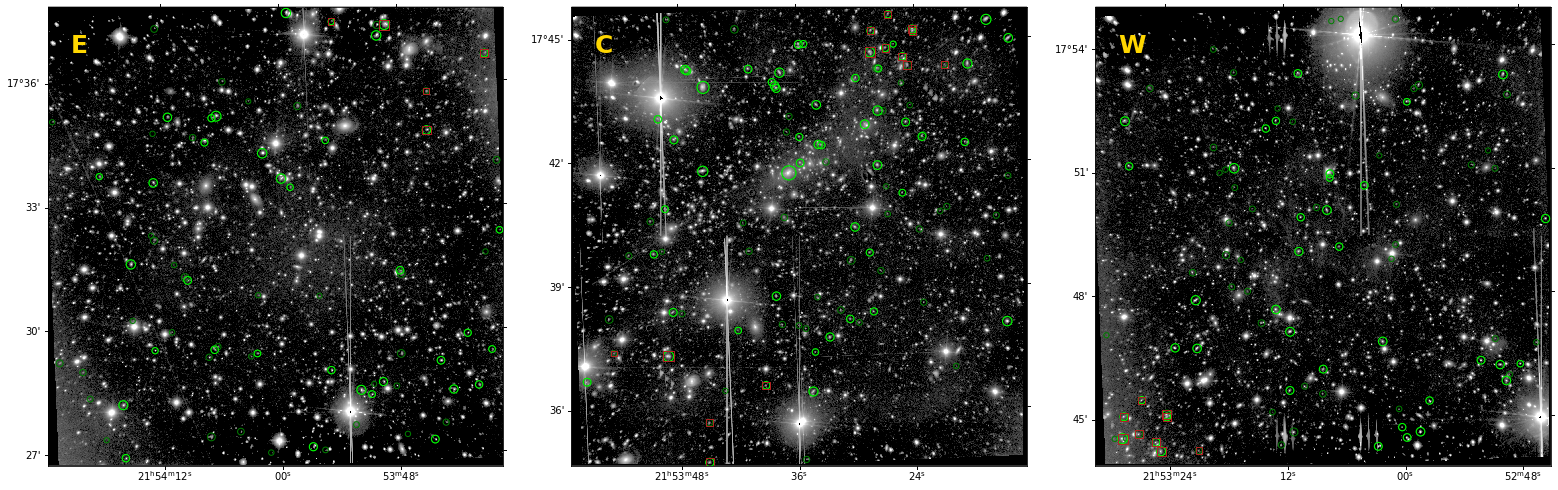

In [23]:
fig = plt.figure(figsize=(24,8))
for i, (datacube, tab, F) in enumerate(zip([datacube_E,datacube_C,datacube_W],
                                           [tab_A2390E,tab_A2390C,tab_A2390W], ["E","C","W"])):
    ax = plt.subplot(1, 3, i+1, projection=datacube.wcs)
    plt.scatter(tab['X'], tab['Y'], s=10+10*tab['radius'], facecolor="none", edgecolor="g")

    tab_iso = tab[tab['cen_offset_ISO-D']>0]
    plt.scatter(tab_iso['X'], tab_iso['Y'], s=10+10*tab_iso['radius'], facecolor="none", edgecolor="lime")
    
    if i==0:
        plt.scatter(tab_EC['X'], tab_EC['Y'], s=10+10*tab_EC['radius'], marker='s', facecolor="none", edgecolor="firebrick")
    if i==1:
        plt.scatter(tab_CE['X'], tab_CE['Y'], s=10+10*tab_CE['radius'], marker='s', facecolor="none", edgecolor="firebrick")
        plt.scatter(tab_CW['X'], tab_CW['Y'], s=10+10*tab_CW['radius'], marker='s', facecolor="none", edgecolor="firebrick")
        
    if i==2:
        plt.scatter(tab_WC['X'], tab_WC['Y'], s=10+10*tab_WC['radius'], marker='s', facecolor="none", edgecolor="firebrick")
    
    plt.imshow(datacube.deep_frame, norm=norm1, cmap='gray', vmin=np.median(datacube.deep_frame), vmax=1e3)
    plt.text(0.05, 0.9, r"$\bf %s$"%F, color='gold', fontsize=25, transform=ax.transAxes)
plt.subplots_adjust(left=0.08, right=0.95, bottom=0.1, top=0.9, wspace=0.15)
# plt.savefig('./pic/ELG_field.pdf')

In [104]:
tab = tab_A2390.copy()
id_non_clus = ['6C', '125C', '439C', '500C', '704C', '738C', '830C', '870C',
               '926C', '953C', '1265C', '814C', '933C', '1140C', '1687C', '780W', '1004W', 
               '293E',  '435E',  '762E', '1427E', '1586E', '206E', '939E']

irow_non_clus = np.array([],dtype=int)
for id_non in id_non_clus:
    irow_non_clus = np.append(irow_non_clus, np.argwhere(tab['ID']==id_non))
tab.remove_rows(irow_non_clus)
tab.remove_row(np.argmin((tab['X']-980)**2 + (tab['Y']-1315)**2))

not_edge = (tab["X"]>=100) & (tab["X"]<=(2064-100)) & (tab["Y"]>=100) & (tab["Y"]<=(2048-100))
has_offset = tab['cen_offset_ISO-D'] > 3 * tab['cen_offset_std_ISO-D']
cond = not_edge & has_offset
tab = tab[cond]
tab

<Table length=92>
  ID     ra      dec      z    ... clus_cen_angle dist_clus_cen  radius
 str5 float64  float64 float64 ...    float64        float64    float64
----- -------- ------- ------- ... -------------- ------------- -------
 213C 328.3937  17.607    0.25 ...          5.963       995.129    7.18
 235C 328.4138 17.6097  0.2309 ...        353.439       965.964    4.72
 329C  328.455 17.6219  0.2263 ...        326.299       988.957    9.42
 350C 328.3927 17.6227  0.2245 ...          7.985       821.452    3.24
 399C 328.3865 17.6287  0.2501 ...         13.619       768.165    5.67
 418C 328.4255 17.6318  0.2502 ...        341.713       750.048    3.43
 452C 328.3117 17.6348  0.2263 ...         55.217      1190.152    7.88
 463C 328.3778 17.6359  0.2496 ...         22.332       719.862    4.48
 490C  328.453 17.6395  0.2292 ...        319.879       818.946    5.38
 492C 328.3677 17.6389  0.2378 ...         31.061       739.022    4.03
  ...      ...     ...     ... ...            ...           ...     ...
 773W 328.2822  17.834   0.254 ...        140.162      2016.365    6.48
 840W 328.2661 17.8438  0.2373 ...         138.58      2211.853    4.65
 877W 328.3216 17.8513  0.2273 ...        153.409       1948.31    7.86
1027W 328.3669 17.8702  0.2274 ...        168.703      1992.264    6.96
1168W 328.2075 17.8873  0.2267 ...         135.76      2992.416    6.53
1361W 328.3684 17.7438  0.2406 ...        145.356       657.409    8.79
1364W 328.2495 17.7421  0.2281 ...        107.618      1721.537    4.85
1394W 328.2397 17.7567  0.2348 ...        111.396      1873.865    4.41
1442W 328.2808 17.8487  0.2374 ...        142.655      2155.078    5.05
1459W  328.294 17.8892   0.237 ...        151.687      2460.454    4.82

(array([23., 38., 32., 13., 11., 13.,  4.,  0.,  0.,  1.,  1.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
 <a list of 11 Patch objects>)

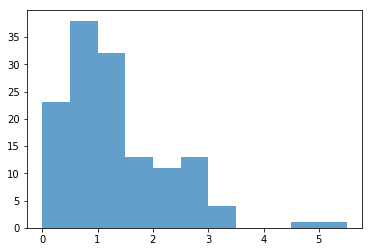

In [90]:
plt.hist(tab_A2390['cen_offset_ISO-D'], bins=np.arange(0,6,0.5),alpha=0.7)
# plt.hist(tab_A2390['cen_offset_ISO-Dms'], bins=np.arange(0,6,0.5),alpha=0.7)

### SImple redshift cut : $\Delta z$ <0.015

(array([ 8., 10.,  5.,  6.,  7.,  8.,  7., 10.]),
 array([  0. ,  22.5,  45. ,  67.5,  90. , 112.5, 135. , 157.5, 180. ]),
 <a list of 1 Patch objects>)

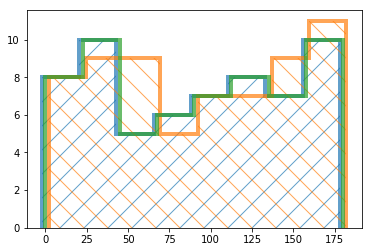

In [149]:
cond_iso = condition_1(tab['cen_offset_ISO-D'], tab['cen_offset_std_ISO-D'], tab['z'], thre=1) # 1 pix
cond_mor = condition_1(tab['cen_offset_ISO-Dm'], tab['cen_offset_std_ISO-Dm'], tab['z'], thre=1) # 1 pix
d_angle_iso = tab['diff_angle_ISO-D'][cond_iso]
d_angle_mor = tab['diff_angle_ISO-Dm'][cond_mor]
plt.hist(d_angle_iso-2, histtype="step", bins=np.linspace(0,180,9)-2, hatch="/", lw=4, alpha=0.7)
plt.hist(d_angle_mor+2, histtype="step", bins=np.linspace(0,180,9)+2, hatch="\\", lw=4, alpha=0.7)

cond_iso = condition_1(tab['cen_offset_ISO-D'], tab['cen_offset_std_ISO-D'], tab['z'], thre=1) # 1kpc
d_angle_iso = tab['diff_angle_ISO-D'][cond_iso]
plt.hist(d_angle_iso, histtype="step", bins=np.linspace(0,180,9), hatch="", lw=4, alpha=0.7)


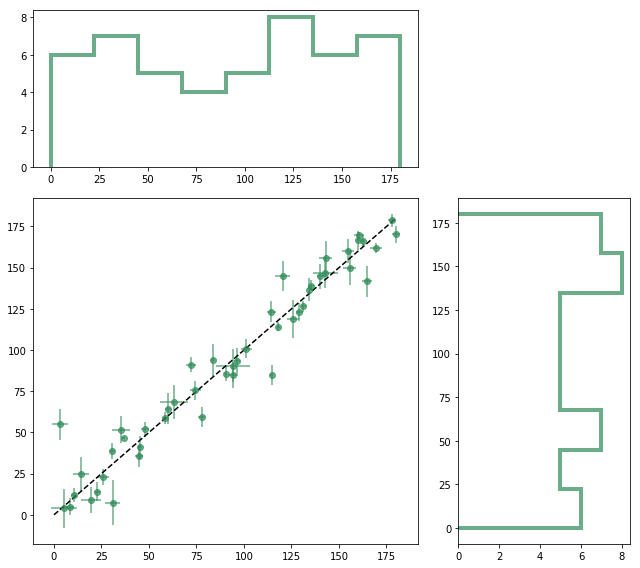

In [152]:
fig = plt.figure(figsize=(9,8))
ax1 = plt.subplot2grid((3, 3), (1, 0), rowspan=2, colspan=2)
ax1.errorbar(tab['diff_angle_ISO-D'][cond_iso&cond_mor], tab['diff_angle_ISO-Dm'][cond_iso&cond_mor],
             xerr=tab['diff_angle_std_ISO-D'][cond_iso&cond_mor],
             yerr=tab['diff_angle_std_ISO-Dm'][cond_iso&cond_mor], fmt="o", color="seagreen", alpha=0.7)
xx = np.linspace(0,180,10)
plt.plot(xx,xx,"k--")

ax2 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
ax2.hist(tab['diff_angle_ISO-D'][cond_iso&cond_mor], histtype="step", bins=np.linspace(0,180,9),
         color="seagreen", lw=4, alpha=0.7)
ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax3.hist(tab['diff_angle_ISO-Dm'][cond_iso&cond_mor], histtype="step", bins=np.linspace(0,180,9),
         color="seagreen", orientation="horizontal", lw=4, alpha=0.7, )
plt.tight_layout()

### Cut from Phase Space Diagram

In [8]:
import astropy.units as u
import astropy.constants as c

def V_esc(R, R_vir=1.55*u.Mpc, M_vir=1e14*c.M_sun, C=6):
    s = R/R_vir
    v_esc = np.sqrt(2*c.G*M_vir*K(s,C)/R_vir).to(u.km/u.s)
    return v_esc
    
def K(s,C=6):
    return g_c(C)*np.log(1+C*s)/s

def g_c(C):
    return 1./(np.log(1+C)-C/(1+C))

def Sigma_vir(R_vir, M_vir):
    return np.sqrt(c.G*M_vir/R_vir).to(u.km/u.s)

from astropy.cosmology import FlatLambdaCDM
h = 0.7
cosmo = FlatLambdaCDM(H0=100*h, Om0=0.3)
distance_cluster = cosmo.angular_diameter_distance(z=0.228)
print(distance_cluster)

len_1arc = distance_cluster*u.arcsec.to(u.rad)
len_pix = len_1arc * 0.322  #pixel length in Mpc
print(len_pix)
print("1kpc = %.3f pix"%(1/len_pix.to(u.kpc)).value)

v_vir = 1100 * u.km/u.s #velocity_dispersion
R_vir = 1.51/h * u.Mpc
print(R_vir, v_vir)

l_R200 = (len_pix/R_vir).value # pixel length in R200 1 pix = l R_vir

752.8932528699639 Mpc
0.0011753416970886723 Mpc
1kpc = 0.851 pix
2.1571428571428575 Mpc 1100.0 km / s


In [9]:
df = pd.read_csv("/home/qliu/Downloads/Rhee2017.csv",header=None)
r_Rhee, v_Rhee = df.iloc[:,0], df.iloc[:,1]

rr = np.linspace(0.001,10,100) *u.Mpc
sigma_v = Sigma_vir(R_vir=R_vir, M_vir=2e15*c.M_sun)
vv = V_esc(rr, R_vir=R_vir, M_vir=2e15*c.M_sun, C=4) # C from Allen2000

In [74]:
def draw_phase_diagram(table, cond, centroid_type='ISO-D', add_text=True,
                       r1=1., v1=1., r2=2., v2 = 3., z0=0.228, threshould=1, ax=None):
    r_norm = np.array(table['dist_clus_cen']) * l_R200  # normed distance in R200
    v_norm = (abs(np.array(table['z'])-z0) * 3e5*u.km/u.s / v_vir).value # normed vel in v_vir (sigma_vir)
    
    d_cen_v = table['cen_offset'+'_'+centroid_type]
    d_cen_std_v = table['cen_offset'+'_'+centroid_type]
    d_angle_v = table['diff_angle'+'_'+centroid_type]
    
    v_esc = lambda r: V_esc(r, R_vir=R_vir, M_vir=2e15*c.M_sun, C=4)
    vv = v_esc(r_norm*R_vir)
    
#     in_cluster = (((r_norm/r2)**2 + (v_norm/v2)**2) < 1.)  # circle
#     in_cluster = ((v_norm/v1) < 1.5*(r_norm/r1)**(-0.5))   # inv-square
    in_cluster = v_norm < (vv/sigma_v)   # escape vel

    cond1, cond2 = cond&(d_angle_v<=90)& in_cluster, cond&(d_angle_v>90)& in_cluster
    
    if ax is None:
        plt.figure(figsize=(9,8))
        ax = plt.subplot(111)
        
    plt.scatter(r_norm[~(cond1|cond2)& in_cluster], v_norm[~(cond1|cond2)& in_cluster], s=150, color="gray",
                edgecolor="none",alpha=0.8,zorder=3, label=None)
    plt.scatter(r_norm[cond1], v_norm[cond1], s=250, color="steelblue",
                edgecolor="none",alpha=0.8,zorder=3,
                label="$\Delta\,d>%.1f$ pix , $\\theta<90^\circ$"%threshould)
    plt.scatter(r_norm[cond2], v_norm[cond2], s=250, color="firebrick",
                edgecolor="none",alpha=0.8,zorder=3,
                label="$\Delta\,d>%.1f$ pix , $\\theta>90^\circ$"%threshould)
    
    virial = ((r_norm/r1)**2 + (v_norm/v1)**2) <= 1.
    non_virial = (~virial) & in_cluster
    inner = ((r_norm/r1)**2 <= 1.) & in_cluster
    outer = ((r_norm/r1)**2 > 1.) &  in_cluster   
    
    condA = non_virial & (r_norm<=1) 
    condB = virial  
    condC = non_virial & (r_norm>1)   

    condA1, condB1, condC1 = condA&cond1, condB&cond1, condC&cond1  
    condA2, condB2, condC2 = condA&cond2, condB&cond2, condC&cond2 
                  
    plt.text(0.05, 0.84,r"$\bf A$",color="k",va="center",fontsize=25,transform=ax.transAxes)
    plt.text(0.05, 0.22,r"$\bf B$",color="k",va="center",fontsize=25,transform=ax.transAxes)
    plt.text(0.85, 0.1,r"$\bf C$",color="k",va="center",fontsize=25,transform=ax.transAxes)
   
    ft = 22
    plt.text(0.76, 0.94,"A :",color="k",va="center",fontsize=ft,transform=ax.transAxes)
    plt.text(0.76, 0.86,"B :",color="k",va="center",fontsize=ft,transform=ax.transAxes)
    plt.text(0.76, 0.78,"C :",color="k",va="center",fontsize=ft,transform=ax.transAxes)
    plt.text(0.84, 0.94,"%d"%(np.sum(condA1)),color="steelblue",va="center",fontsize=ft,transform=ax.transAxes)
    plt.text(0.84, 0.86,"%d"%(np.sum(condB1)),color="steelblue",va="center",fontsize=ft,transform=ax.transAxes)
    plt.text(0.84, 0.78,"%d"%(np.sum(condC1)),color="steelblue",va="center",fontsize=ft,transform=ax.transAxes)
    plt.text(0.9, 0.94,"%d"%(np.sum(condA2)),color="firebrick",va="center",fontsize=ft,transform=ax.transAxes)
    plt.text(0.9, 0.86,"%d"%(np.sum(condB2)),color="firebrick",va="center",fontsize=ft,transform=ax.transAxes)
    plt.text(0.9, 0.78,"%d"%(np.sum(condC2)),color="firebrick",va="center",fontsize=ft,transform=ax.transAxes)

    from matplotlib.patches import Ellipse
    ellipse1 = Ellipse(xy=(0,0), width=2*r1, height=2*v1, 
                      edgecolor='orange', fc='orange', lw=5, alpha=0.4,zorder=2)
    ax.add_patch(ellipse1)

    df = pd.read_csv("/home/qliu/Downloads/Jaffe2018a.csv",header=None)  #Jaffe2018
    r_Jafa, v_Jafa = df.iloc[:,0], df.iloc[:,1]
    plt.plot(np.unique(r_Jafa), np.poly1d(np.polyfit(r_Jafa, v_Jafa, 1))(np.unique(r_Jafa)),
             color="y", lw=5,ls="-",alpha=0.5,label="High M Galaxy")

    df = pd.read_csv("/home/qliu/Downloads/Jaffe2018b.csv",header=None)  #Jaffe2018
    r_Jafa, v_Jafa = df.iloc[:,0], df.iloc[:,1]
    plt.plot(np.unique(r_Jafa), np.poly1d(np.polyfit(r_Jafa, v_Jafa, 1))(np.unique(r_Jafa)),
             color="m", lw=5,ls="-",alpha=0.5,label="Low M Galaxy")

    xx = np.linspace(0.01,2.2*R_vir.value) * u.Mpc
    plt.fill_between(xx/R_vir, y1=v_esc(xx)/sigma_v,y2=0,color='seagreen',alpha=0.2,zorder=1)
    
    plt.vlines(1, ymin=0.01, ymax=v_esc(R_vir)/sigma_v,color="k",linestyle=":", alpha=0.7, lw=4)
    
    if add_text:
        for (r, v, ID) in zip(r_norm[in_cluster], v_norm[in_cluster], table["ID"][in_cluster]):
            if r>0: 
                plt.text(r, v, ID, fontsize=8)

    plt.xlim(-0.005, r2+0.05), plt.ylim(-0.005, v2+0.1)
    plt.xticks(fontsize=14), plt.yticks(fontsize=14)
    plt.xlabel("r / R$_{200}$",fontsize=18)
    plt.ylabel("|v$_{los}$ - v$_0$| / $\sigma_{vir}$",fontsize=18)
    plt.legend(loc=9,fontsize=14)
    
    plt.tight_layout()
    return in_cluster, non_virial, inner

mean continua-subtracted (original)

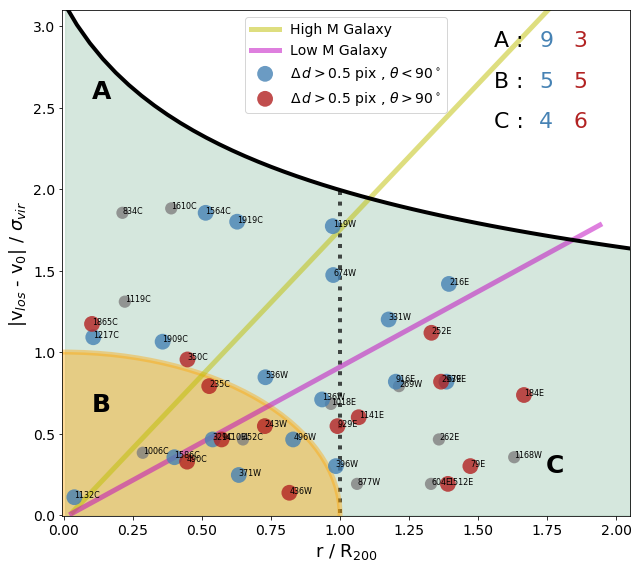

In [75]:
# SN 2.5
thre = 0.5
cond_iso = condition_2(tab['cen_offset_ISO-D'], tab['cen_offset_std_ISO-D'], tab['z'], thre=thre) # 1kpc

in_cluster, non_virial, inner = draw_phase_diagram(tab, cond_iso, centroid_type='ISO-D', threshould=thre)
plt.plot(rr/R_vir, vv/sigma_v, color="k",lw=4,ls="-")

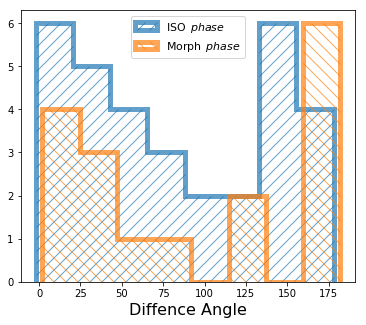

In [71]:
plt.figure(figsize=(6,5))

cond_iso = condition_2(tab['cen_offset_ISO-D'], tab['cen_offset_std_ISO-D'], tab['z'], thre=thre) # 1 kpc
cond_mor = condition_2(tab['cen_offset_ISO-Dm'], tab['cen_offset_std_ISO-Dm'], tab['z'], thre=thre) # 1 kpc

d_angle_iso = tab['diff_angle_ISO-D'][cond_iso & in_cluster]
d_angle_mor = tab['diff_angle_ISO-Dm'][cond_mor & in_cluster]
plt.hist(d_angle_iso-2, histtype="step", bins=np.linspace(0,180,9)-2, hatch="//", lw=5, alpha=0.7,
        label='ISO $\,phase$',zorder=2)
plt.hist(d_angle_mor+2, histtype="step", bins=np.linspace(0,180,9)+2, hatch="\\\\", lw=5, alpha=0.7,
        label='Morph $\,phase$',zorder=2)

plt.xlabel('Diffence Angle', fontsize=16)

plt.legend(loc=9,fontsize=11)

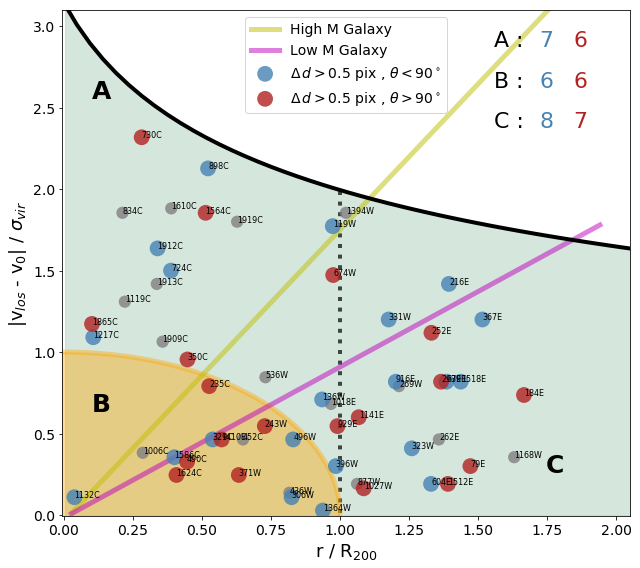

In [85]:
# SN 2.0
thre = 0.5
cond_iso = condition_2(tab['cen_offset_ISO-D'], tab['cen_offset_std_ISO-D'], tab['z'], thre=thre) # 1kpc

in_cluster, non_virial, inner = draw_phase_diagram(tab, cond_iso, centroid_type='ISO-D', threshould=thre)
plt.plot(rr/R_vir, vv/sigma_v, color="k",lw=4,ls="-")

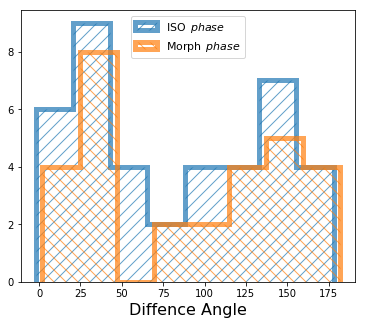

In [86]:
plt.figure(figsize=(6,5))

cond_iso = condition_2(tab['cen_offset_ISO-D'], tab['cen_offset_std_ISO-D'], tab['z'], thre=thre) # 1 kpc
cond_mor = condition_2(tab['cen_offset_ISO-Dm'], tab['cen_offset_std_ISO-Dm'], tab['z'], thre=thre) # 1 kpc

d_angle_iso = tab['diff_angle_ISO-D'][cond_iso & in_cluster]
d_angle_mor = tab['diff_angle_ISO-Dm'][cond_mor & in_cluster]
plt.hist(d_angle_iso-2, histtype="step", bins=np.linspace(0,180,9)-2, hatch="//", lw=5, alpha=0.7,
        label='ISO $\,phase$',zorder=2)
plt.hist(d_angle_mor+2, histtype="step", bins=np.linspace(0,180,9)+2, hatch="\\\\", lw=5, alpha=0.7,
        label='Morph $\,phase$',zorder=2)

plt.xlabel('Diffence Angle', fontsize=16)

plt.legend(loc=9,fontsize=11)

weighted continua-subtracted (original)

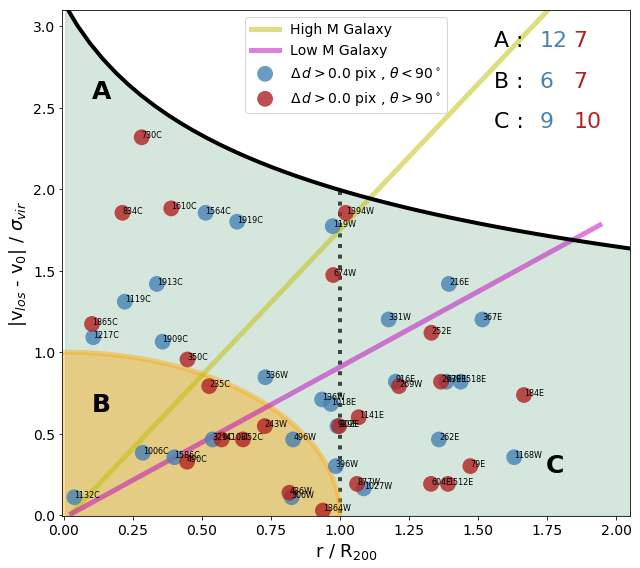

In [108]:
# SN 2.5
thre = 0.
cond_iso = condition_2(tab['cen_offset_ISO-D'], tab['cen_offset_std_ISO-D'], tab['z'], thre=thre) # 1kpc

in_cluster, non_virial, inner = draw_phase_diagram(tab, cond_iso, centroid_type='ISO-D', threshould=thre)
plt.plot(rr/R_vir, vv/sigma_v, color="k",lw=4,ls="-")

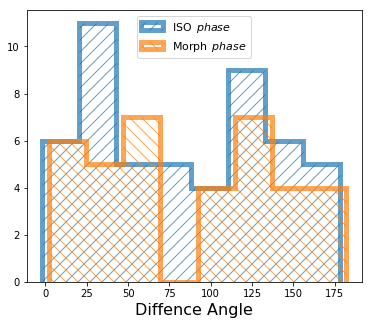

In [111]:
plt.figure(figsize=(6,5))

cond_iso = condition_2(tab['cen_offset_ISO-D'], tab['cen_offset_std_ISO-D'], tab['z'], thre=thre) # 1 kpc
cond_mor = condition_2(tab['cen_offset_ISO-Dm'], tab['cen_offset_std_ISO-Dm'], tab['z'], thre=thre) # 1 kpc

d_angle_iso = tab['diff_angle_ISO-D'][cond_iso & in_cluster]
d_angle_mor = tab['diff_angle_ISO-Dm'][cond_mor & in_cluster]
plt.hist(d_angle_iso-2, histtype="step", bins=np.linspace(0,180,9)-2, hatch="//", lw=5, alpha=0.7,
        label='ISO $\,phase$',zorder=2)
plt.hist(d_angle_mor+2, histtype="step", bins=np.linspace(0,180,9)+2, hatch="\\\\", lw=5, alpha=0.7,
        label='Morph $\,phase$',zorder=2)

plt.xlabel('Diffence Angle', fontsize=16)

plt.legend(loc=9,fontsize=11)

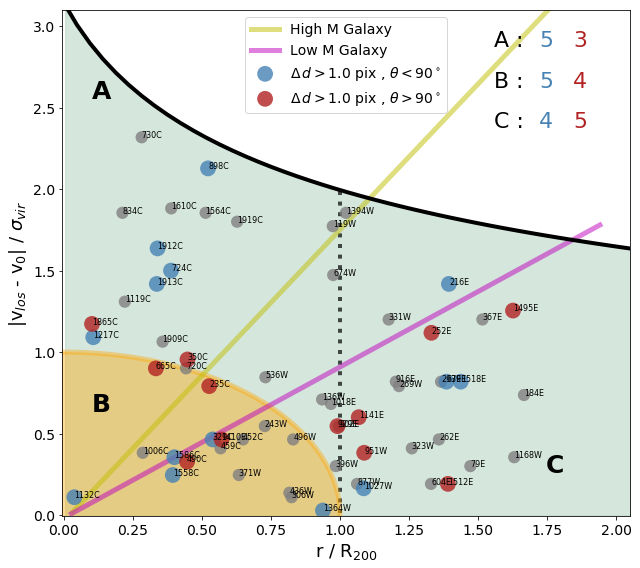

In [97]:
# SN 2.0
thre = 1.0
cond_iso = condition_2(tab['cen_offset_ISO-D'], tab['cen_offset_std_ISO-D'], tab['z'], thre=thre) # 1kpc

in_cluster, non_virial, inner = draw_phase_diagram(tab, cond_iso, centroid_type='ISO-D', threshould=thre)
plt.plot(rr/R_vir, vv/sigma_v, color="k",lw=4,ls="-")

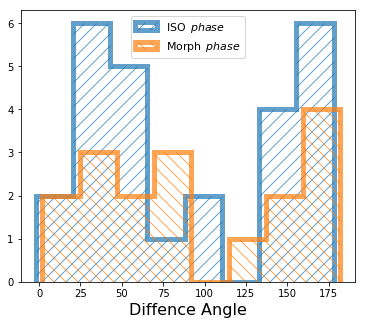

In [98]:
plt.figure(figsize=(6,5))

cond_iso = condition_2(tab['cen_offset_ISO-D'], tab['cen_offset_std_ISO-D'], tab['z'], thre=thre) # 1 kpc
cond_mor = condition_2(tab['cen_offset_ISO-Dm'], tab['cen_offset_std_ISO-Dm'], tab['z'], thre=thre) # 1 kpc

d_angle_iso = tab['diff_angle_ISO-D'][cond_iso & in_cluster]
d_angle_mor = tab['diff_angle_ISO-Dm'][cond_mor & in_cluster]
plt.hist(d_angle_iso-2, histtype="step", bins=np.linspace(0,180,9)-2, hatch="//", lw=5, alpha=0.7,
        label='ISO $\,phase$',zorder=2)
plt.hist(d_angle_mor+2, histtype="step", bins=np.linspace(0,180,9)+2, hatch="\\\\", lw=5, alpha=0.7,
        label='Morph $\,phase$',zorder=2)

plt.xlabel('Diffence Angle', fontsize=16)

plt.legend(loc=9,fontsize=11)

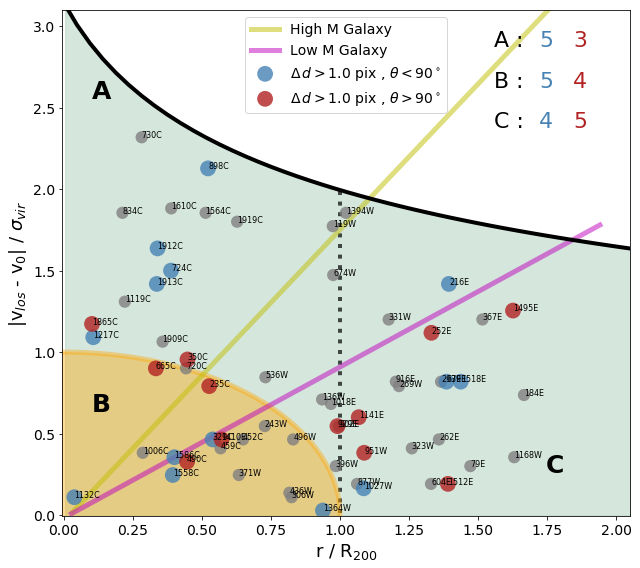

In [99]:
# SN 2.0
thre = 1.0
cond_iso = condition_2(tab['cen_offset_ISO-D'], tab['cen_offset_std_ISO-D'], tab['z'], thre=thre) # 1kpc

in_cluster, non_virial, inner = draw_phase_diagram(tab, cond_iso, centroid_type='ISO-D', threshould=thre)
plt.plot(rr/R_vir, vv/sigma_v, color="k",lw=4,ls="-")

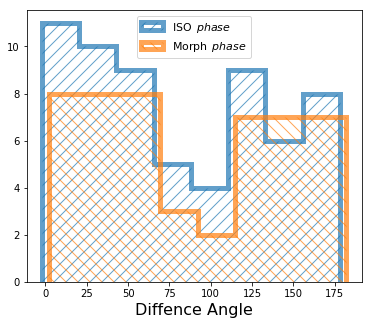

In [96]:
plt.figure(figsize=(6,5))

cond_iso = condition_2(tab['cen_offset_ISO-D'], tab['cen_offset_std_ISO-D'], tab['z'], thre=thre) # 1 kpc
cond_mor = condition_2(tab['cen_offset_ISO-Dm'], tab['cen_offset_std_ISO-Dm'], tab['z'], thre=thre) # 1 kpc

d_angle_iso = tab['diff_angle_ISO-D'][cond_iso & in_cluster]
d_angle_mor = tab['diff_angle_ISO-Dm'][cond_mor & in_cluster]
plt.hist(d_angle_iso-2, histtype="step", bins=np.linspace(0,180,9)-2, hatch="//", lw=5, alpha=0.7,
        label='ISO $\,phase$',zorder=2)
plt.hist(d_angle_mor+2, histtype="step", bins=np.linspace(0,180,9)+2, hatch="\\\\", lw=5, alpha=0.7,
        label='Morph $\,phase$',zorder=2)

plt.xlabel('Diffence Angle', fontsize=16)

plt.legend(loc=9,fontsize=11)

mean continua-subtracted (LPF)

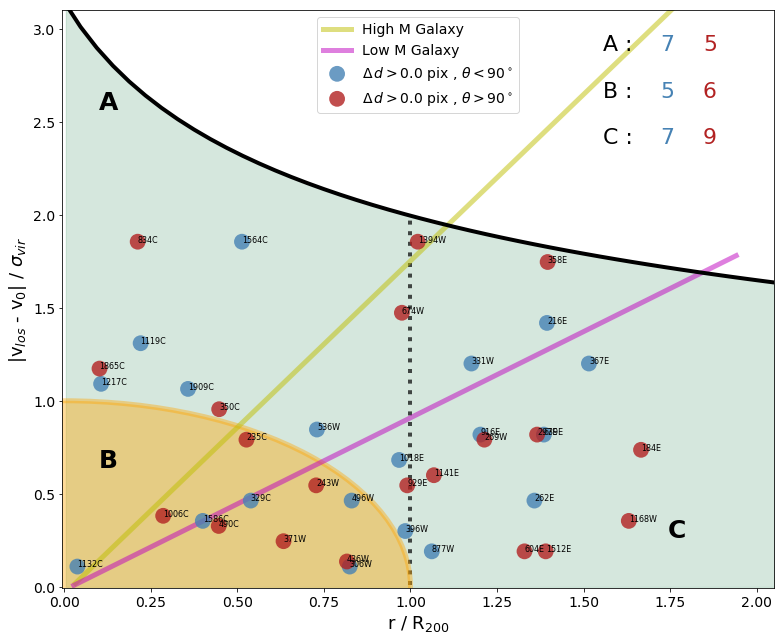

In [41]:
# SN 2.5
thre = 0.
cond_iso = condition_2(tab['cen_offset_ISO-Ds'], tab['cen_offset_std_ISO-Ds'], tab['z'], thre=thre) # 1kpc

in_cluster, non_virial, inner = draw_phase_diagram(tab, cond_iso, centroid_type='ISO-Ds', threshould=thre)
plt.plot(rr/R_vir, vv/sigma_v, color="k",lw=4,ls="-")

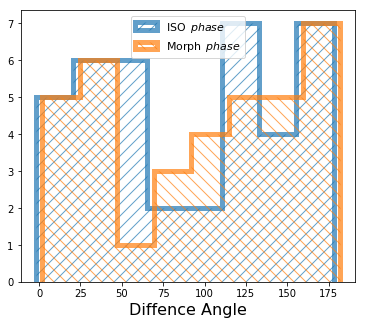

In [43]:
plt.figure(figsize=(6,5))

cond_iso = condition_2(tab['cen_offset_ISO-Ds'], tab['cen_offset_std_ISO-Ds'], tab['z'], thre=thre) # 1 kpc
cond_mor = condition_2(tab['cen_offset_ISO-Dms'], tab['cen_offset_std_ISO-Dms'], tab['z'], thre=thre) # 1 kpc

d_angle_iso = tab['diff_angle_ISO-Ds'][cond_iso & in_cluster]
d_angle_mor = tab['diff_angle_ISO-Dms'][cond_mor & in_cluster]
plt.hist(d_angle_iso-2, histtype="step", bins=np.linspace(0,180,9)-2, hatch="//", lw=5, alpha=0.7,
        label='ISO $\,phase$',zorder=2)
plt.hist(d_angle_mor+2, histtype="step", bins=np.linspace(0,180,9)+2, hatch="\\\\", lw=5, alpha=0.7,
        label='Morph $\,phase$',zorder=2)

plt.xlabel('Diffence Angle', fontsize=16)

plt.legend(loc=9,fontsize=11)

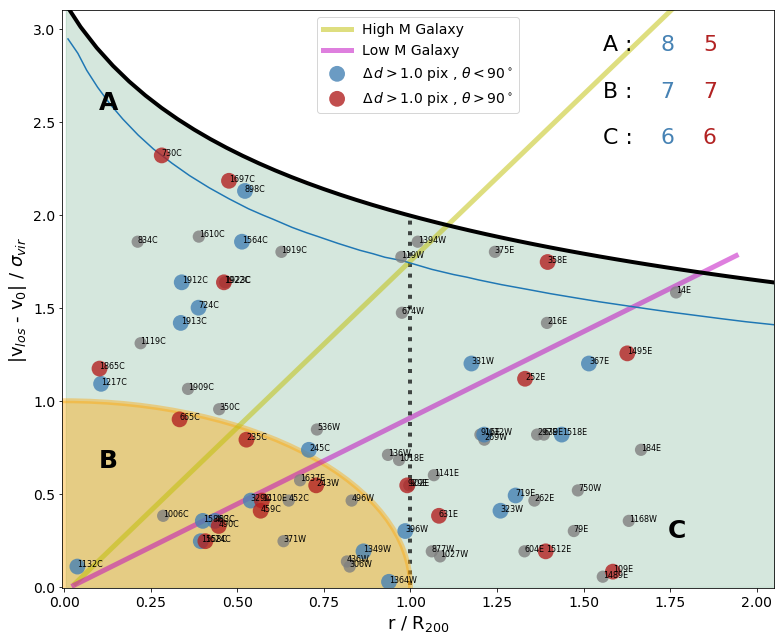

In [67]:
# SN 2.5 smooth
thre=1
cond_iso = condition_2(tab['cen_offset_ISO-Ds'], tab['cen_offset_std_ISO-Ds'], tab['z'], thre=thre) # 1kpc

in_cluster, non_virial, inner = draw_phase_diagram(tab, cond_iso, centroid_type='ISO-Ds', threshould=thre)
plt.plot(rr/R_vir, vv/sigma_v, color="k",lw=4,ls="-")

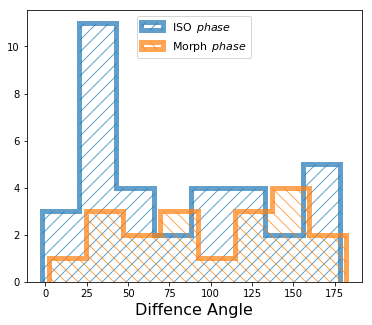

In [64]:
plt.figure(figsize=(6,5))

cond_iso = condition_2(tab['cen_offset_ISO-Ds'], tab['cen_offset_std_ISO-Ds'], tab['z'], thre=thre) # 1 kpc
cond_mor = condition_2(tab['cen_offset_ISO-Dms'], tab['cen_offset_std_ISO-Dms'], tab['z'], thre=thre) # 1 kpc

d_angle_iso = tab['diff_angle_ISO-Ds'][cond_iso & in_cluster]
d_angle_mor = tab['diff_angle_ISO-Dms'][cond_mor & in_cluster]
plt.hist(d_angle_iso-2, histtype="step", bins=np.linspace(0,180,9)-2, hatch="//", lw=5, alpha=0.7,
        label='ISO $\,phase$',zorder=2)
plt.hist(d_angle_mor+2, histtype="step", bins=np.linspace(0,180,9)+2, hatch="\\\\", lw=5, alpha=0.7,
        label='Morph $\,phase$',zorder=2)

plt.xlabel('Diffence Angle', fontsize=16)

plt.legend(loc=9,fontsize=11)

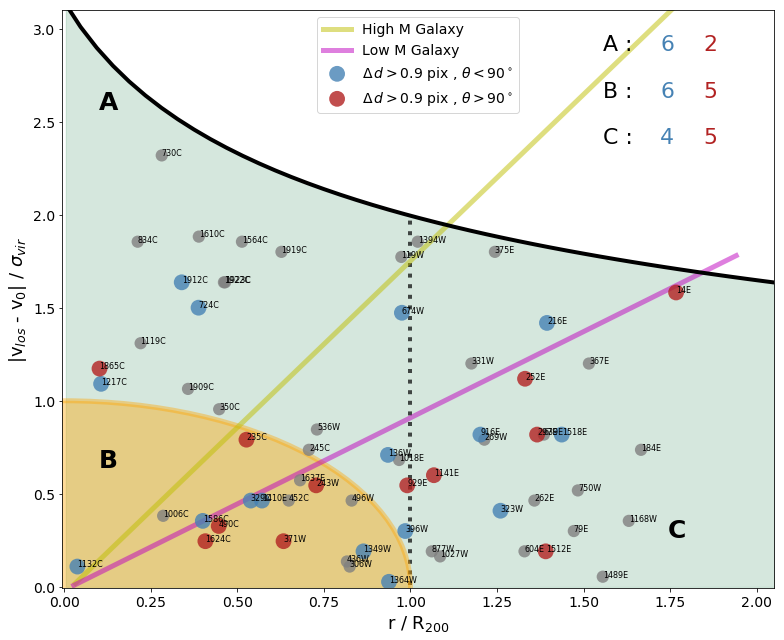

In [39]:
# SN 2.0
thre=0.86
cond_iso = condition_2(tab['cen_offset_ISO-D'], tab['cen_offset_std_ISO-D'], tab['z'], thre=thre) # 1kpc

in_cluster, non_virial, inner = draw_phase_diagram(tab, cond_iso, centroid_type='ISO-D', threshould=thre)
plt.plot(rr/R_vir, vv/sigma_v, color="k",lw=4,ls="-")

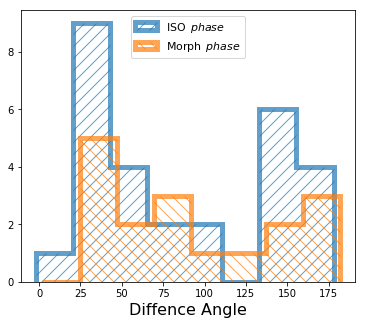

In [40]:
plt.figure(figsize=(6,5))

cond_iso = condition_2(tab['cen_offset_ISO-D'], tab['cen_offset_std_ISO-D'], tab['z'], thre=thre) # 1 kpc
cond_mor = condition_2(tab['cen_offset_ISO-Dm'], tab['cen_offset_std_ISO-Dm'], tab['z'], thre=thre) # 1 kpc

d_angle_iso = tab['diff_angle_ISO-D'][cond_iso & in_cluster]
d_angle_mor = tab['diff_angle_ISO-Dm'][cond_mor & in_cluster]
plt.hist(d_angle_iso-2, histtype="step", bins=np.linspace(0,180,9)-2, hatch="//", lw=5, alpha=0.7,
        label='ISO $\,phase$',zorder=2)
plt.hist(d_angle_mor+2, histtype="step", bins=np.linspace(0,180,9)+2, hatch="\\\\", lw=5, alpha=0.7,
        label='Morph $\,phase$',zorder=2)

plt.xlabel('Diffence Angle', fontsize=16)

plt.legend(loc=9,fontsize=11)

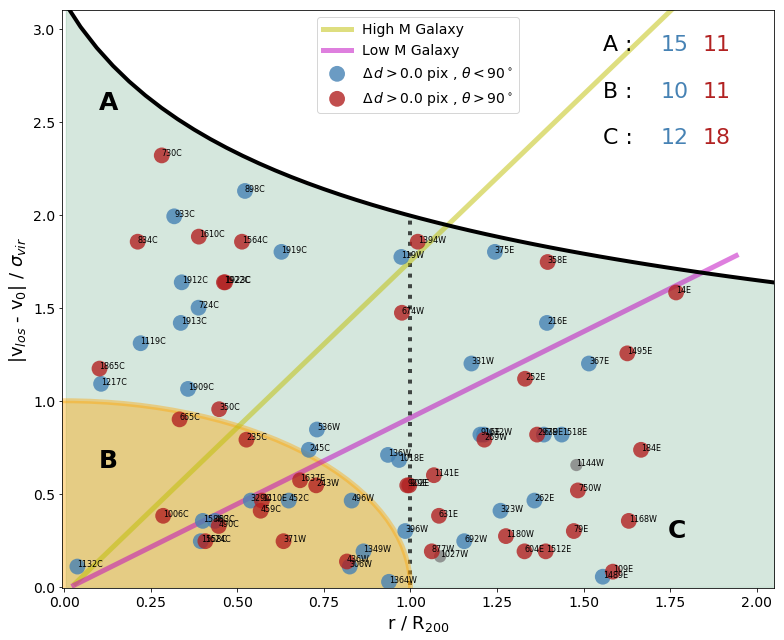

In [280]:
thre=0.
cond_iso = condition_2(tab['cen_offset_ISO-D'], tab['cen_offset_std_ISO-D'], tab['z'], thre=thre) # 1kpc

in_cluster, non_virial, inner = draw_phase_diagram(tab, cond_iso, centroid_type='ISO-D', threshould=thre)
plt.plot(rr/R_vir, vv/sigma_v, color="k",lw=4,ls="-")

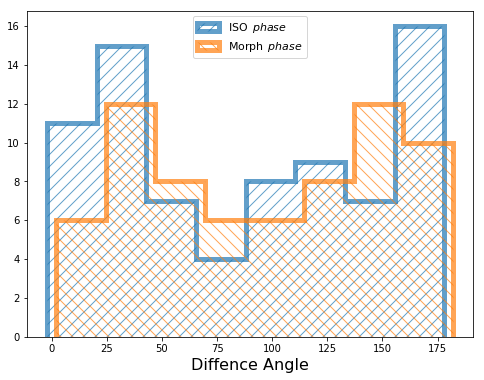

In [284]:
plt.figure(figsize=(8,6))

cond_iso = condition_2(tab['cen_offset_ISO-D'], tab['cen_offset_std_ISO-D'], tab['z'], thre=thre) # 1 kpc
cond_mor = condition_2(tab['cen_offset_ISO-Dm'], tab['cen_offset_std_ISO-Dm'], tab['z'], thre=thre) # 1 kpc

d_angle_iso = tab['diff_angle_ISO-D'][cond_iso & in_cluster]
d_angle_mor = tab['diff_angle_ISO-Dm'][cond_mor & in_cluster]
plt.hist(d_angle_iso-2, histtype="step", bins=np.linspace(0,180,9)-2, hatch="//", lw=5, alpha=0.7,
        label='ISO $\,phase$',zorder=2)
plt.hist(d_angle_mor+2, histtype="step", bins=np.linspace(0,180,9)+2, hatch="\\\\", lw=5, alpha=0.7,
        label='Morph $\,phase$',zorder=2)

plt.xlabel('Diffence Angle', fontsize=16)

plt.legend(loc=9,fontsize=11)

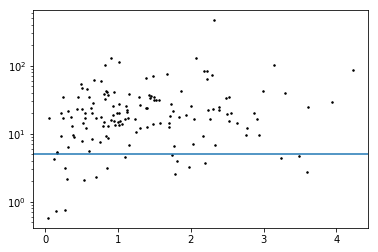

In [211]:
plt.semilogy(tab['cen_offset_ISO-D'],
             tab['cen_offset_ISO-D']/tab['cen_offset_std_ISO-D'], 'k.', ms=3)
plt.axhline(5)

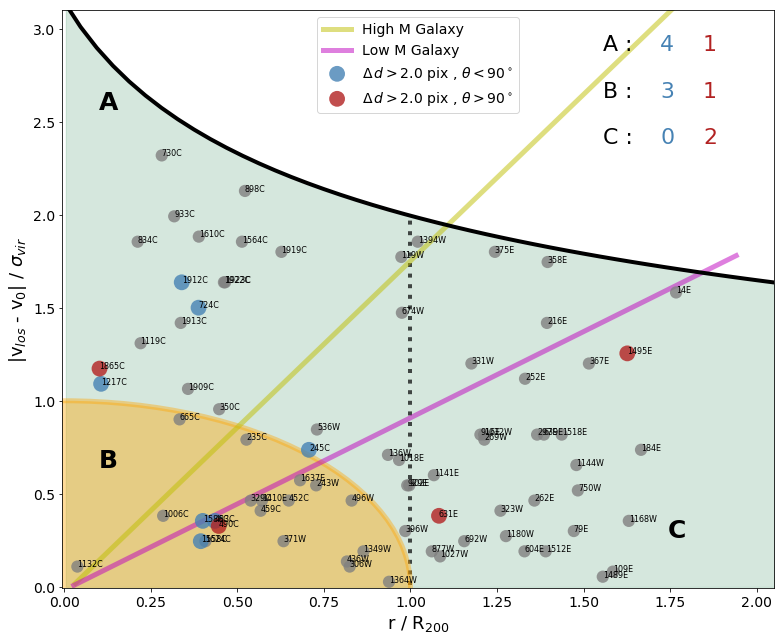

In [317]:
thre=2.
cond_iso = condition_2(tab['cen_offset_ISO-D'], tab['cen_offset_std_ISO-D'], tab['z'], thre=thre) # 1kpc

in_cluster, non_virial, inner = draw_phase_diagram(tab, cond_iso, centroid_type='ISO-D', threshould=thre)
plt.plot(rr/R_vir, vv/sigma_v, color="k",lw=4,ls="-")

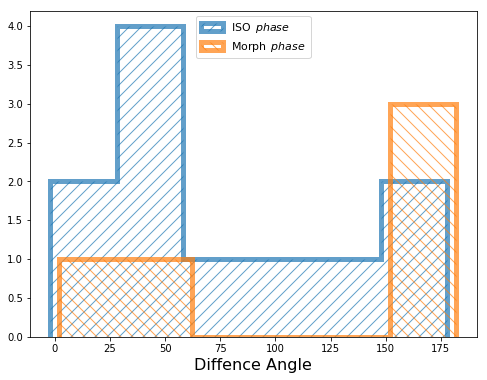

In [321]:
plt.figure(figsize=(8,6))

cond_iso = condition_2(tab['cen_offset_ISO-D'], tab['cen_offset_std_ISO-D'], tab['z'], thre=thre) # 1 kpc
cond_mor = condition_2(tab['cen_offset_ISO-Dm'], tab['cen_offset_std_ISO-Dm'], tab['z'], thre=thre) # 1 kpc

d_angle_iso = tab['diff_angle_ISO-D'][cond_iso & in_cluster]
d_angle_mor = tab['diff_angle_ISO-Dm'][cond_mor & in_cluster]
plt.hist(d_angle_iso-2, histtype="step", bins=np.linspace(0,180,7)-2, hatch="//", lw=5, alpha=0.7,
        label='ISO $\,phase$',zorder=2)
plt.hist(d_angle_mor+2, histtype="step", bins=np.linspace(0,180,7)+2, hatch="\\\\", lw=5, alpha=0.7,
        label='Morph $\,phase$',zorder=2)

plt.xlabel('Diffence Angle', fontsize=16)

plt.legend(loc=9,fontsize=11)

weighted continua-subtracted (LPF)

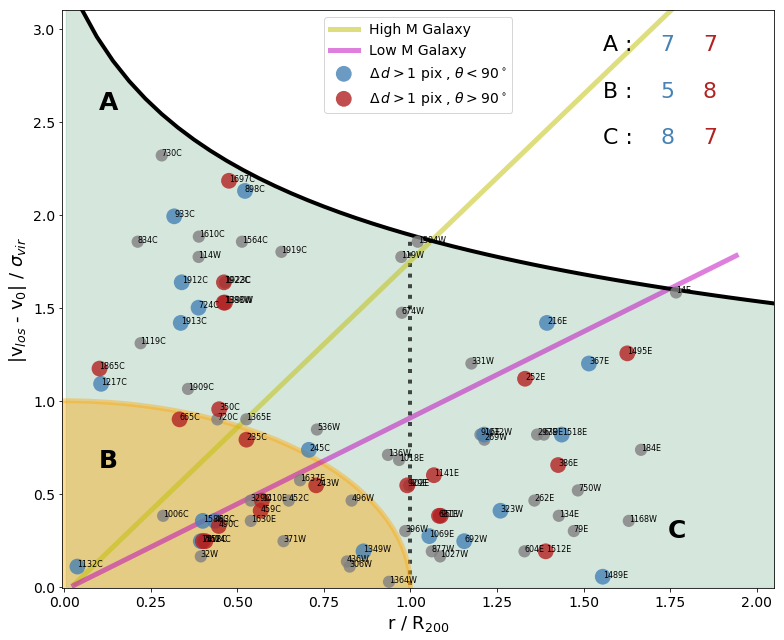

In [64]:
cond_iso = condition_1(tab['cen_offset_ISO-D'], tab['cen_offset_std_ISO-D'], tab['z'], thre=1) # 1kpc

in_cluster, non_virial = draw_phase_diagram(tab, cond_iso, centroid_type='ISO-D')
plt.plot(rr/R_vir, vv/sigma_v, color="k",lw=4,ls="-")

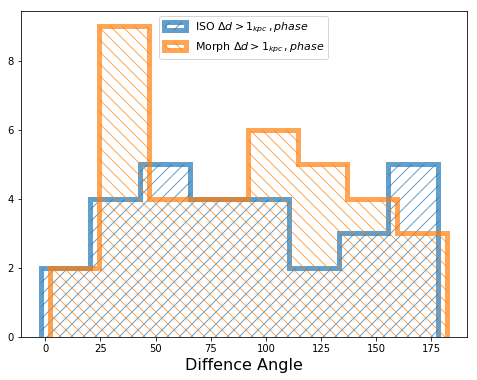

In [66]:
plt.figure(figsize=(8,6))

cond_iso = condition_1(tab['cen_offset_ISO-D'], tab['cen_offset_std_ISO-D'], tab['z'], thre=1) # 1 kpc
cond_mor = condition_1(tab['cen_offset_ISO-Dm'], tab['cen_offset_std_ISO-Dm'], tab['z'], thre=1) # 1 kpc

d_angle_iso = tab['diff_angle_ISO-D'][cond_iso & non_virial]
d_angle_mor = tab['diff_angle_ISO-Dm'][cond_mor & non_virial]
plt.hist(d_angle_iso-2, histtype="step", bins=np.linspace(0,180,9)-2, hatch="//", lw=5, alpha=0.7,
        label='ISO $\Delta d>1_{kpc}\,,phase$',zorder=2)
plt.hist(d_angle_mor+2, histtype="step", bins=np.linspace(0,180,9)+2, hatch="\\\\", lw=5, alpha=0.7,
        label='Morph $\Delta d>1_{kpc}\,,phase$',zorder=2)

plt.xlabel('Diffence Angle', fontsize=16)

plt.legend(loc=9,fontsize=11)

MEAN CONTINUM-SUBTRACTED

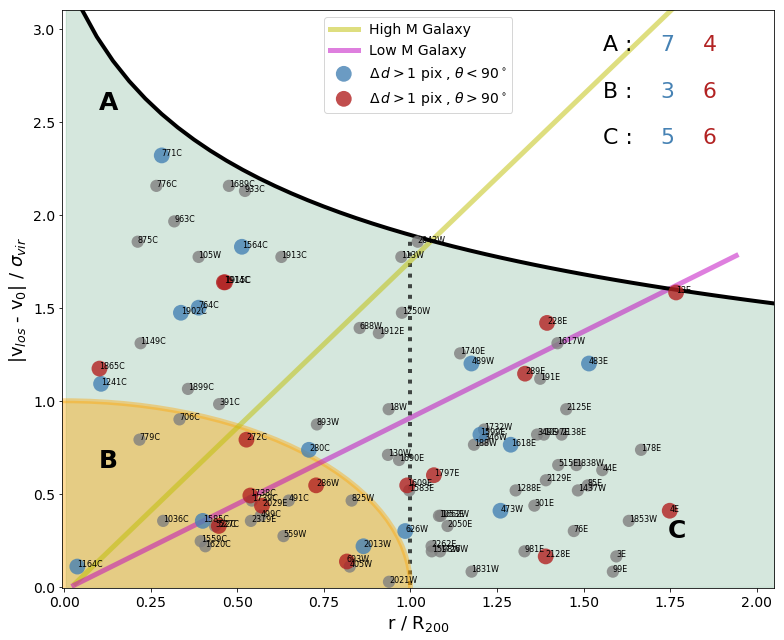

In [136]:
cond_iso = condition_1(tab['cen_offset_ISO-D'], tab['cen_offset_std_ISO-D'], tab['z'], thre=.855) # 1kpc

in_cluster = draw_phase_diagram(tab, cond_iso, centroid_type='ISO-D')
plt.plot(rr/R_vir, vv/sigma_v, color="k",lw=4,ls="-")

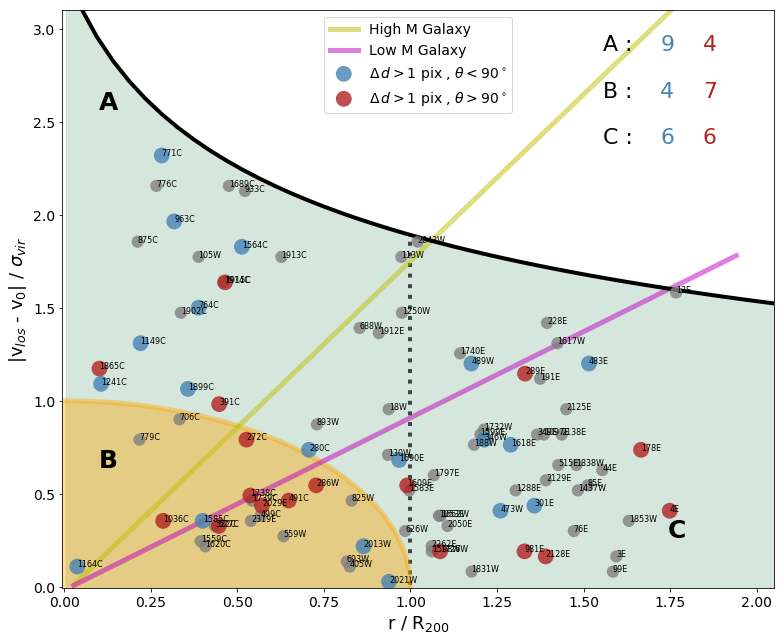

In [137]:
cond_iso = condition_1(tab['cen_offset_ISO-Dms'], tab['cen_offset_std_ISO-Dms'], tab['z'], thre=.855) # 1kpc

in_cluster = draw_phase_diagram(tab, cond_iso, centroid_type='ISO-D')
plt.plot(rr/R_vir, vv/sigma_v, color="k",lw=4,ls="-")

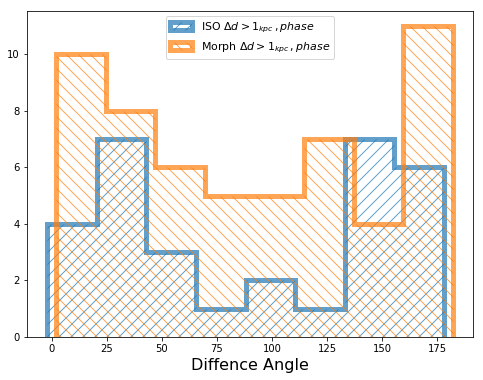

In [141]:
plt.figure(figsize=(8,6))

cond_iso = condition_1(tab['cen_offset_ISO-D'], tab['cen_offset_std_ISO-D'], tab['z'], thre=.855) # 1 kpc
cond_mor = condition_1(tab['cen_offset_ISO-Dms'], tab['cen_offset_std_ISO-Dms'], tab['z'], thre=.855) # 1 kpc
cond_aper = condition_1(tab['cen_offset_APER'], tab['cen_offset_std_APER'], tab['z'], thre=.855) # 1 kpc

d_angle_iso = tab['diff_angle_ISO-D'][cond_iso & in_cluster]
d_angle_mor = tab['diff_angle_ISO-Dms'][cond_mor & in_cluster]
d_angle_aper = tab['diff_angle_APER'][cond_mor & in_cluster]
plt.hist(d_angle_iso-2, histtype="step", bins=np.linspace(0,180,9)-2, hatch="//", lw=5, alpha=0.7,
        label='ISO $\Delta d>1_{kpc}\,,phase$',zorder=2)
plt.hist(d_angle_mor+2, histtype="step", bins=np.linspace(0,180,9)+2, hatch="\\\\", lw=5, alpha=0.7,
        label='Morph $\Delta d>1_{kpc}\,,phase$',zorder=2)

plt.xlabel('Diffence Angle', fontsize=16)

plt.legend(loc=9,fontsize=11)

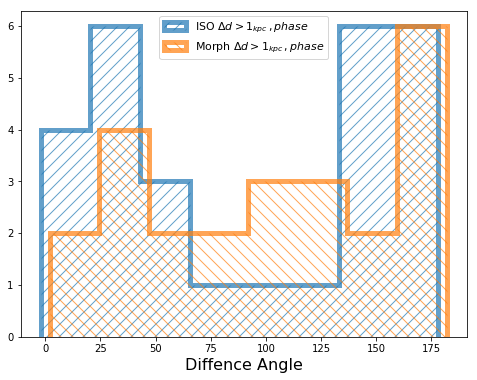

In [143]:
plt.figure(figsize=(8,6))

cond_iso = condition_2(tab['cen_offset_ISO-D'], tab['cen_offset_std_ISO-D'], tab['z'], thre=.855) # 1 kpc
cond_mor = condition_2(tab['cen_offset_ISO-Dms'], tab['cen_offset_std_ISO-Dms'], tab['z'], thre=.855) # 1 kpc
cond_aper = condition_2(tab['cen_offset_APER'], tab['cen_offset_std_APER'], tab['z'], thre=.855) # 1 kpc

d_angle_iso = tab['diff_angle_ISO-D'][cond_iso & in_cluster]
d_angle_mor = tab['diff_angle_ISO-Dms'][cond_mor & in_cluster]
d_angle_aper = tab['diff_angle_APER'][cond_mor & in_cluster]
plt.hist(d_angle_iso-2, histtype="step", bins=np.linspace(0,180,9)-2, hatch="//", lw=5, alpha=0.7,
        label='ISO $\Delta d>1_{kpc}\,,phase$',zorder=2)
plt.hist(d_angle_mor+2, histtype="step", bins=np.linspace(0,180,9)+2, hatch="\\\\", lw=5, alpha=0.7,
        label='Morph $\Delta d>1_{kpc}\,,phase$',zorder=2)

plt.xlabel('Diffence Angle', fontsize=16)

plt.legend(loc=9,fontsize=11)

WEIGHTED W/ CONTINUA

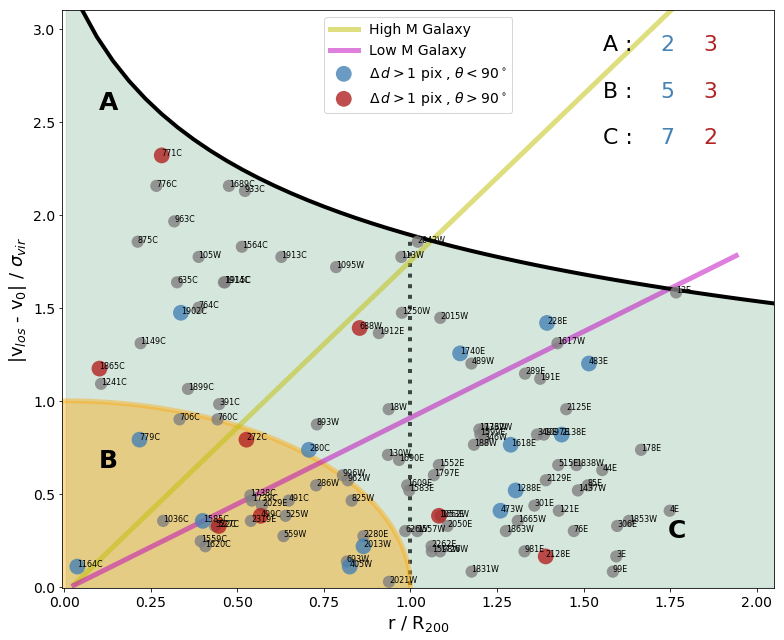

In [122]:
cond_iso = condition_1(tab['cen_offset_ISO-D'], tab['cen_offset_std_ISO-D'], tab['z'], thre=1) # 1kpc

in_cluster = draw_phase_diagram(tab, cond_iso, centroid_type='ISO-D')
plt.plot(rr/R_vir, vv/sigma_v, color="k",lw=4,ls="-")

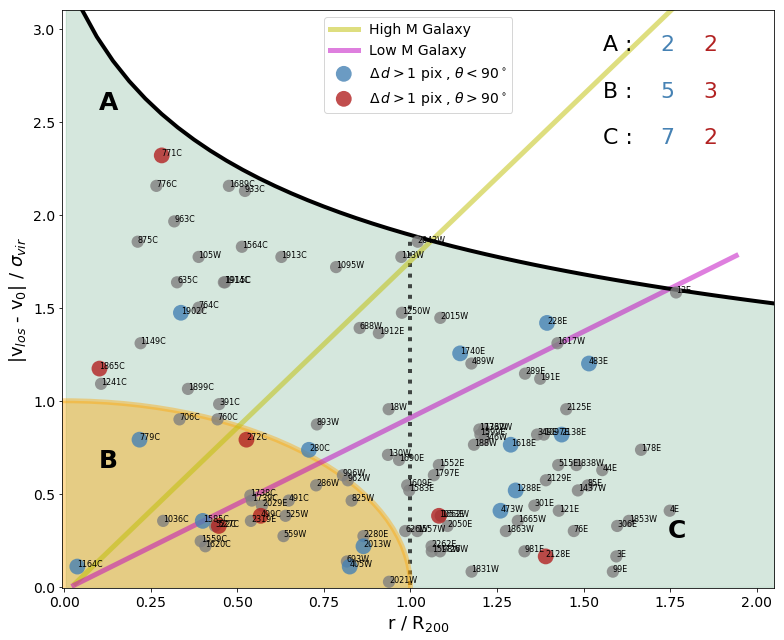

In [116]:
cond_iso = condition_2(tab['cen_offset_ISO-D'], tab['cen_offset_std_ISO-D'], tab['z'], thre=1) # 1kpc

in_cluster = draw_phase_diagram(tab, cond_iso, centroid_type='ISO-D')
plt.plot(rr/R_vir, vv/sigma_v, color="k",lw=4,ls="-")

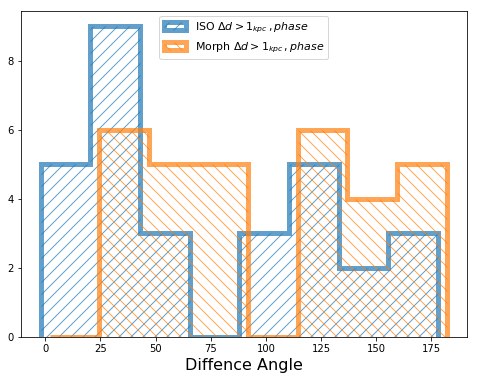

In [121]:
plt.figure(figsize=(8,6))

cond_iso = condition_1(tab['cen_offset_ISO-D'], tab['cen_offset_std_ISO-D'], tab['z'], thre=.855) # 1 kpc
cond_mor = condition_1(tab['cen_offset_ISO-Dms'], tab['cen_offset_std_ISO-Dms'], tab['z'], thre=.855) # 1 kpc
cond_aper = condition_1(tab['cen_offset_APER'], tab['cen_offset_std_APER'], tab['z'], thre=.855) # 1 kpc

d_angle_iso = tab['diff_angle_ISO-D'][cond_iso & in_cluster]
d_angle_mor = tab['diff_angle_ISO-Dms'][cond_mor & in_cluster]
d_angle_aper = tab['diff_angle_APER'][cond_mor & in_cluster]
plt.hist(d_angle_iso-2, histtype="step", bins=np.linspace(0,180,9)-2, hatch="//", lw=5, alpha=0.7,
        label='ISO $\Delta d>1_{kpc}\,,phase$',zorder=2)
plt.hist(d_angle_mor+2, histtype="step", bins=np.linspace(0,180,9)+2, hatch="\\\\", lw=5, alpha=0.7,
        label='Morph $\Delta d>1_{kpc}\,,phase$',zorder=2)

plt.xlabel('Diffence Angle', fontsize=16)

plt.legend(loc=9,fontsize=11)

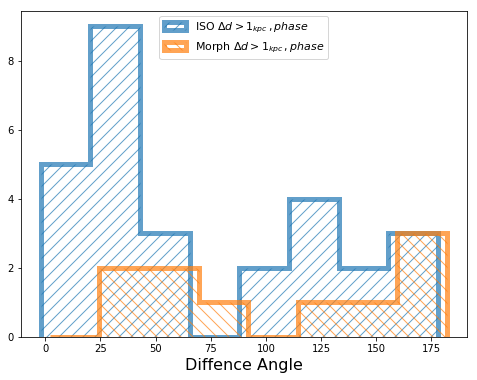

In [123]:
plt.figure(figsize=(8,6))

cond_iso = condition_2(tab['cen_offset_ISO-D'], tab['cen_offset_std_ISO-D'], tab['z'], thre=.855) # 1 kpc
cond_mor = condition_2(tab['cen_offset_ISO-Dms'], tab['cen_offset_std_ISO-Dms'], tab['z'], thre=.855) # 1 kpc
cond_aper = condition_2(tab['cen_offset_APER'], tab['cen_offset_std_APER'], tab['z'], thre=.855) # 1 kpc

d_angle_iso = tab['diff_angle_ISO-D'][cond_iso & in_cluster]
d_angle_mor = tab['diff_angle_ISO-Dms'][cond_mor & in_cluster]
d_angle_aper = tab['diff_angle_APER'][cond_mor & in_cluster]
plt.hist(d_angle_iso-2, histtype="step", bins=np.linspace(0,180,9)-2, hatch="//", lw=5, alpha=0.7,
        label='ISO $\Delta d>1_{kpc}\,,phase$',zorder=2)
plt.hist(d_angle_mor+2, histtype="step", bins=np.linspace(0,180,9)+2, hatch="\\\\", lw=5, alpha=0.7,
        label='Morph $\Delta d>1_{kpc}\,,phase$',zorder=2)

plt.xlabel('Diffence Angle', fontsize=16)

plt.legend(loc=9,fontsize=11)

weighted continua-subtracted

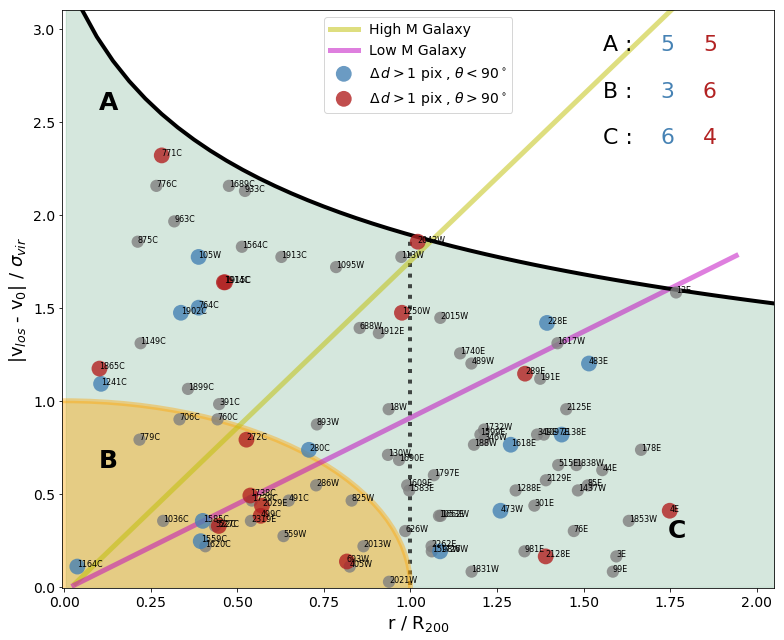

In [158]:
cond_iso = condition_1(tab['cen_offset_ISO-D'], tab['cen_offset_std_ISO-D'], tab['z'], thre=1) # 1kpc

in_cluster = draw_phase_diagram(tab, cond_iso, centroid_type='ISO-D')
plt.plot(rr/R_vir, vv/sigma_v, color="k",lw=4,ls="-")

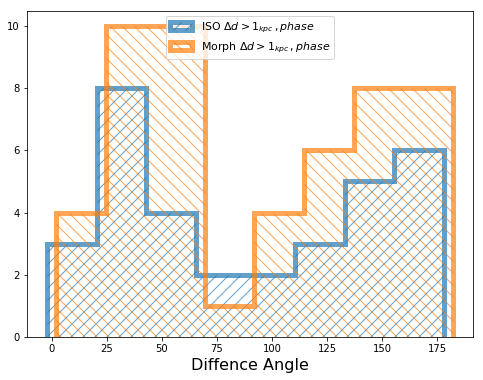

In [171]:
plt.figure(figsize=(8,6))

cond_iso = condition_1(tab['cen_offset_ISO-D'], tab['cen_offset_std_ISO-D'], tab['z'], thre=.855) # 1 kpc
cond_mor = condition_1(tab['cen_offset_ISO-Dms'], tab['cen_offset_std_ISO-Dms'], tab['z'], thre=.855) # 1 kpc
cond_aper = condition_1(tab['cen_offset_APER'], tab['cen_offset_std_APER'], tab['z'], thre=.855) # 1 kpc

d_angle_iso = tab['diff_angle_ISO-D'][cond_iso & in_cluster]
d_angle_mor = tab['diff_angle_ISO-Dms'][cond_mor & in_cluster]
d_angle_aper = tab['diff_angle_APER'][cond_mor & in_cluster]
plt.hist(d_angle_iso-2, histtype="step", bins=np.linspace(0,180,9)-2, hatch="//", lw=5, alpha=0.7,
        label='ISO $\Delta d>1_{kpc}\,,phase$',zorder=2)
plt.hist(d_angle_mor+2, histtype="step", bins=np.linspace(0,180,9)+2, hatch="\\\\", lw=5, alpha=0.7,
        label='Morph $\Delta d>1_{kpc}\,,phase$',zorder=2)
# plt.hist(d_angle_aper, histtype="step", bins=np.linspace(0,180,9), hatch="", lw=5, alpha=0.7,
#         label='APER $\Delta d>1_{kpc}\,,phase$',zorder=2)

plt.xlabel('Diffence Angle', fontsize=16)

plt.legend(loc=9,fontsize=11)

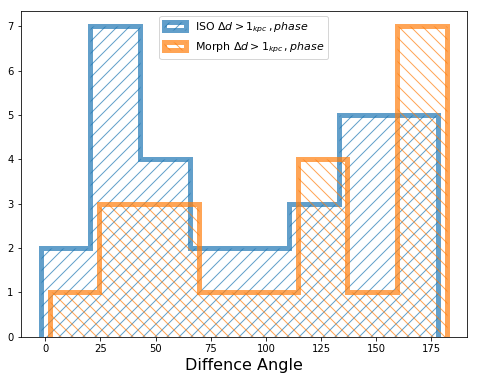

In [169]:
plt.figure(figsize=(8,6))

cond_iso = condition_2(tab['cen_offset_ISO-D'], tab['cen_offset_std_ISO-D'], tab['z'], thre=.855) # 1 kpc
cond_mor = condition_2(tab['cen_offset_ISO-Dms'], tab['cen_offset_std_ISO-Dms'], tab['z'], thre=.855) # 1 kpc
cond_aper = condition_2(tab['cen_offset_APER'], tab['cen_offset_std_APER'], tab['z'], thre=.855) # 1 kpc

d_angle_iso = tab['diff_angle_ISO-D'][cond_iso & in_cluster]
d_angle_mor = tab['diff_angle_ISO-Dms'][cond_mor & in_cluster]
d_angle_aper = tab['diff_angle_APER'][cond_mor & in_cluster]
plt.hist(d_angle_iso-2, histtype="step", bins=np.linspace(0,180,9)-2, hatch="//", lw=5, alpha=0.7,
        label='ISO $\Delta d>1_{kpc}\,,phase$',zorder=2)
plt.hist(d_angle_mor+2, histtype="step", bins=np.linspace(0,180,9)+2, hatch="\\\\", lw=5, alpha=0.7,
        label='Morph $\Delta d>1_{kpc}\,,phase$',zorder=2)
# plt.hist(d_angle_aper, histtype="step", bins=np.linspace(0,180,9), hatch="", lw=5, alpha=0.7,
#         label='APER $\Delta d>1_{kpc}\,,phase$',zorder=2)

plt.xlabel('Diffence Angle', fontsize=16)

plt.legend(loc=9,fontsize=11)

### OLD

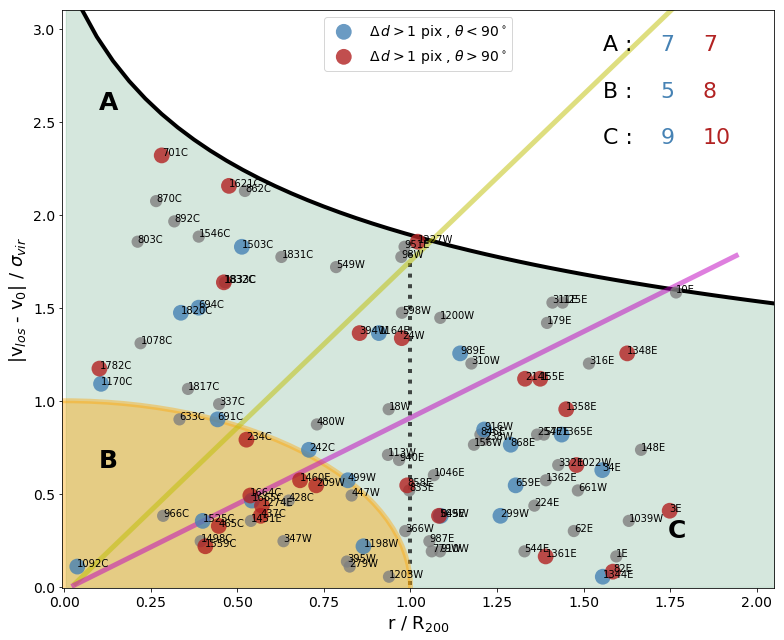

In [86]:
cond_iso = condition_1(tab['cen_offset_ISO-Ds'], tab['cen_offset_std_ISO-Ds'], tab['z'], thre=1) # 1kpc

in_cluster = draw_phase_diagram(tab, cond_iso, centroid_type='ISO-Ds')
# plt.plot(r_Rhee, v_Rhee, color="m",ls="--",label="Rhee2017")
plt.plot(rr/R_vir, vv/sigma_v, color="k",lw=4,ls="-")

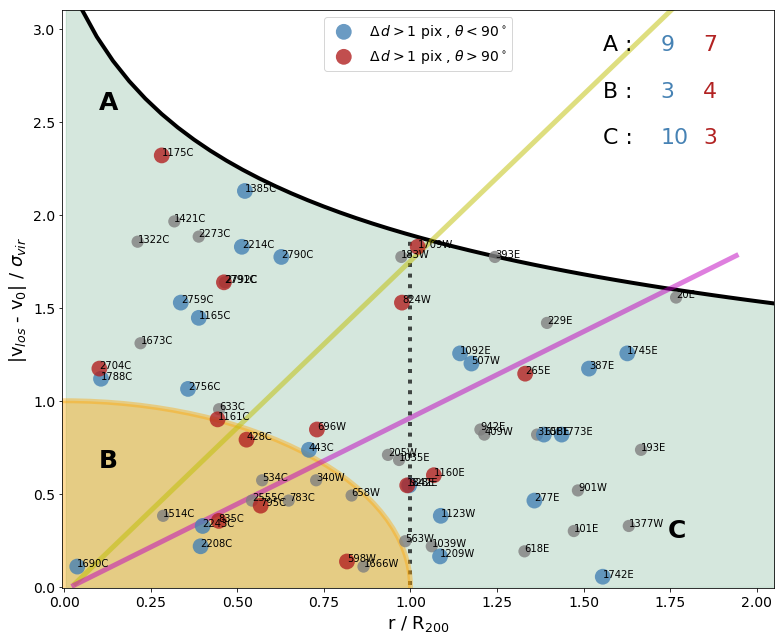

In [369]:
cond_iso = condition_1(tab['cen_offset_ISO-D'], tab['cen_offset_std_ISO-D'], tab['z'], thre=0.855) # 1kpc

in_cluster = draw_phase_diagram(tab, cond_iso, centroid_type='ISO-D')
# plt.plot(r_Rhee, v_Rhee, color="m",ls="--",label="Rhee2017")
plt.plot(rr/R_vir, vv/sigma_v, color="k",lw=4,ls="-")

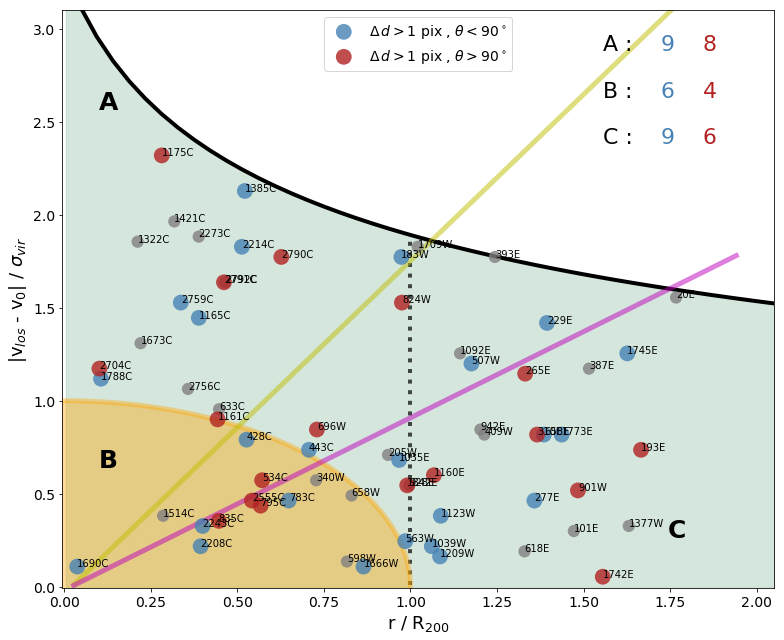

In [370]:
cond_mor = condition_1(tab['cen_offset_ISO-Dm'], tab['cen_offset_std_ISO-Dm'], tab['z'], thre=0.855) # 1 kpc

in_cluster = draw_phase_diagram(tab, cond_mor, centroid_type='ISO-Dm')
# plt.plot(r_Rhee, v_Rhee, color="m",ls="--",label="Rhee2017")
plt.plot(rr/R_vir, vv/sigma_v, color="k",lw=4,ls="-")

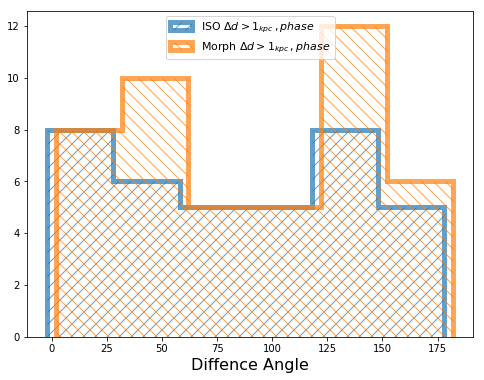

In [53]:
plt.figure(figsize=(8,6))

cond_iso = condition_1(tab['cen_offset_ISO-D'], tab['cen_offset_std_ISO-D'], tab['z'], thre=0.855) # 1 kpc
cond_mor = condition_1(tab['cen_offset_ISO-Dm'], tab['cen_offset_std_ISO-Dm'], tab['z'], thre=0.855) # 1 kpc

d_angle_iso = tab['diff_angle_ISO-D'][cond_iso & in_cluster]
d_angle_mor = tab['diff_angle_ISO-Dm'][cond_mor & in_cluster]
plt.hist(d_angle_iso-2, histtype="step", bins=np.linspace(0,180,7)-2, hatch="//", lw=5, alpha=0.7,
        label='ISO $\Delta d>1_{kpc}\,,phase$',zorder=2)
plt.hist(d_angle_mor+2, histtype="step", bins=np.linspace(0,180,7)+2, hatch="\\\\", lw=5, alpha=0.7,
        label='Morph $\Delta d>1_{kpc}\,,phase$',zorder=2)

plt.xlabel('Diffence Angle', fontsize=16)

plt.legend(loc=9,fontsize=11)

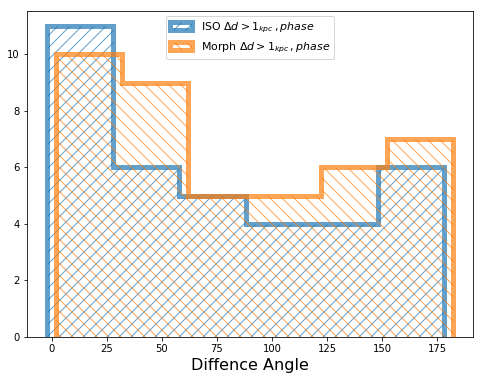

In [374]:
plt.figure(figsize=(8,6))

cond_iso = condition_1(tab['cen_offset_ISO-D'], tab['cen_offset_std_ISO-D'], tab['z'], thre=0.855) # 1 kpc
cond_mor = condition_1(tab['cen_offset_ISO-Dm'], tab['cen_offset_std_ISO-Dm'], tab['z'], thre=0.855) # 1 kpc

d_angle_iso = tab['diff_angle_ISO-D'][cond_iso & in_cluster]
d_angle_mor = tab['diff_angle_ISO-Dm'][cond_mor & in_cluster]
plt.hist(d_angle_iso-2, histtype="step", bins=np.linspace(0,180,7)-2, hatch="//", lw=5, alpha=0.7,
        label='ISO $\Delta d>1_{kpc}\,,phase$',zorder=2)
plt.hist(d_angle_mor+2, histtype="step", bins=np.linspace(0,180,7)+2, hatch="\\\\", lw=5, alpha=0.7,
        label='Morph $\Delta d>1_{kpc}\,,phase$',zorder=2)

plt.xlabel('Diffence Angle', fontsize=16)

plt.legend(loc=9,fontsize=11)

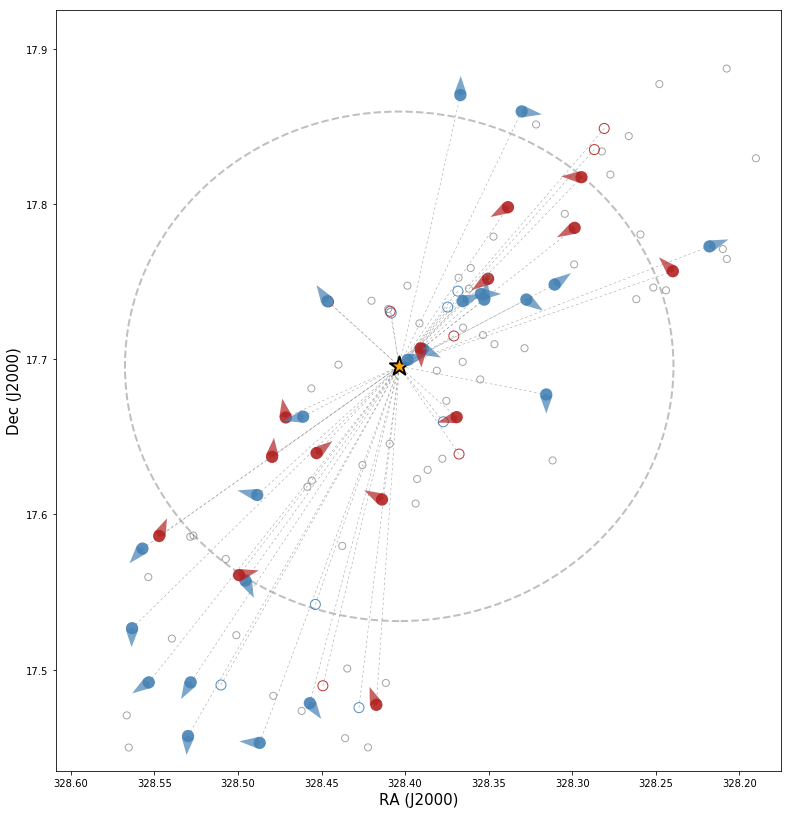

In [375]:
fig, ax = plt.subplots(figsize=(13,14))
ax.set_xlim(tab['ra'].max() + 0.015, tab['ra'].min() - 0.015)
ax.set_ylim(tab['dec'].min() - 0.015, tab['dec'].max() + 0.015)
plt.xlabel("RA (J2000)", fontsize=15)
plt.ylabel("Dec (J2000)", fontsize=15)

coord_BCG = (328.40351201,17.69544013)

plt.scatter(coord_BCG[0], coord_BCG[1], s=400, marker='*', edgecolor="k", color="orange", lw=2, alpha=1,zorder=2)

circle = plt.Circle(coord_BCG, R_vir/len_pix*0.322/3600, color='gray', ls="--", lw=2., alpha=0.5, fill=False)
ax.add_artist(circle)
for k, (ID, x, y, pa, theta) in enumerate(zip(tab['ID'], tab['ra'], tab['dec'],
                                               tab['pa_ISO-D'], tab['diff_angle_ISO-D'])):
    color = "steelblue" if theta<90 else "firebrick"
    if (cond_iso& in_cluster)[k]:
        plt.scatter(x, y, s=150, color=color, edgecolors="none", alpha=0.9,zorder=2)
        plt.plot((x,coord_BCG[0]), (y,coord_BCG[1]), color="gray", ls="--", dashes=(5,5),  lw=.5, alpha=0.8, zorder=1)
        plt.arrow(x, y, -np.sin(pa*np.pi/180)*0.001, -np.cos(pa*np.pi/180)*0.001, 
                  color=color, width=0.0025, lw=0.01, alpha=0.7, zorder=2)
#         plt.text(x+(np.random.rand()*1-2)*0.002,y+(np.random.rand()*1-2Q)*0.002,'#'+ID,color='k',fontsize=8)
    elif (cond_iso & (~in_cluster))[k]:
        plt.scatter(x, y, s=100, facecolors="none", edgecolors=color, alpha=0.9,zorder=2)
        plt.plot((x,coord_BCG[0]), (y,coord_BCG[1]), color="gray", ls="--", dashes=(5,5),  lw=.5, alpha=0.8, zorder=1)
        plt.arrow(x, y, -np.sin(pa*np.pi/180)*0.001, -np.cos(pa*np.pi/180)*0.001, 
                  ec=color, fc="none", width=0.002, lw=0.01, alpha=0.7, zorder=2)
#         plt.text(x+(np.random.rand()*1-2)*0.002,y+(np.random.rand()*1-2)*0.002,'#'+ID,color='k',fontsize=7)
    elif theta>0:
        plt.scatter(x, y, s=50, facecolor='none', color="gray", alpha=0.7, zorder=2)


#### OLD

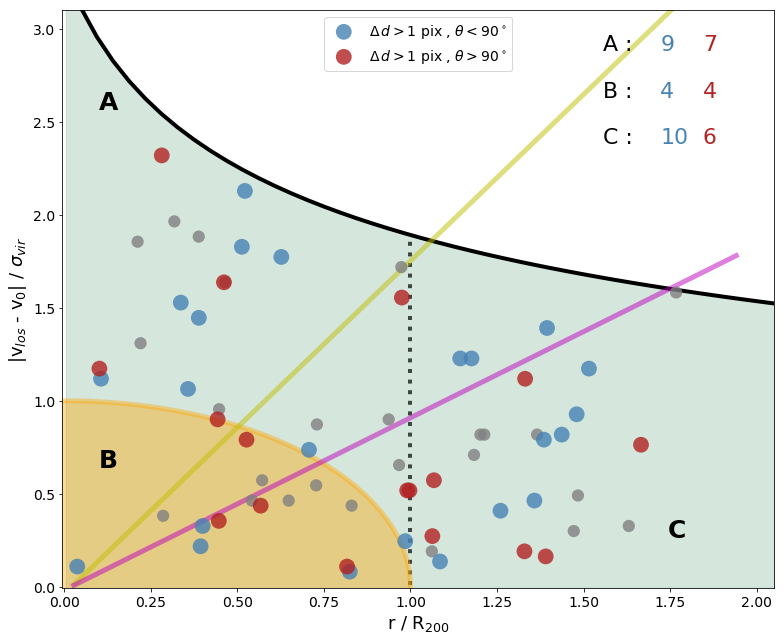

In [831]:
cond_iso = condition_1(tab['cen_offset_ISO-D'], tab['cen_offset_std_ISO-D'], tab['z'], thre=0.855) # 1kpc

in_cluster = draw_phase_diagram(tab, cond_iso, centroid_type='ISO-D')
# plt.plot(r_Rhee, v_Rhee, color="m",ls="--",label="Rhee2017")
plt.plot(rr/R_vir, vv/sigma_v, color="k",lw=4,ls="-")

df = pd.read_csv("/home/qliu/Downloads/Jaffe2018a.csv",header=None)  #Jaffe2018
r_Jafa, v_Jafa = df.iloc[:,0], df.iloc[:,1]
plt.plot(np.unique(r_Jafa), np.poly1d(np.polyfit(r_Jafa, v_Jafa, 1))(np.unique(r_Jafa)),
         color="y", lw=5,ls="-",alpha=0.5,label="High M Galaxy")

df = pd.read_csv("/home/qliu/Downloads/Jaffe2018b.csv",header=None)  #Jaffe2018
r_Jafa, v_Jafa = df.iloc[:,0], df.iloc[:,1]
plt.plot(np.unique(r_Jafa), np.poly1d(np.polyfit(r_Jafa, v_Jafa, 1))(np.unique(r_Jafa)),
         color="m", lw=5,ls="-",alpha=0.5,label="Low M Galaxy")


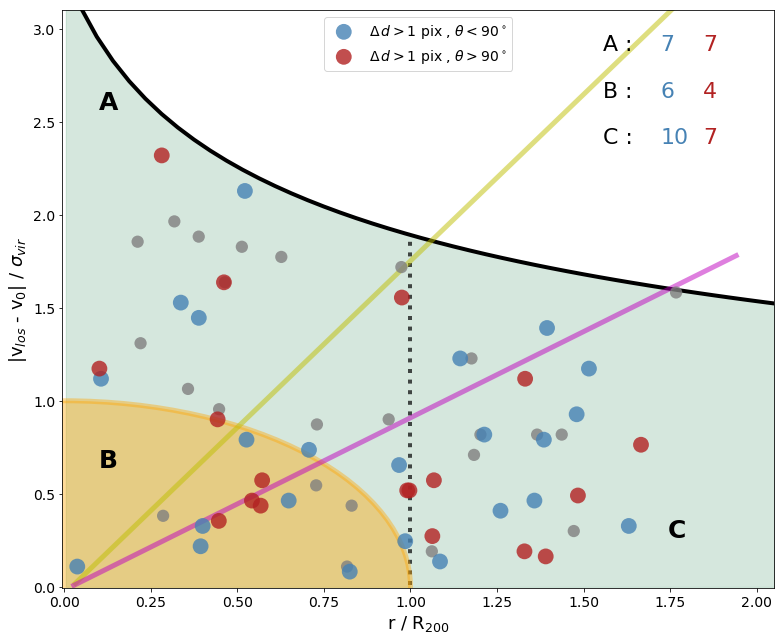

In [525]:
cond_mor = condition_1(tab['cen_offset_ISO-Dm'], tab['cen_offset_std_ISO-Dm'], tab['z'], thre=1) # 1pix

in_cluster = draw_phase_diagram(tab, cond_mor, centroid_type='ISO-Dm')
# plt.plot(r_Rhee, v_Rhee, color="m",ls="--",label="Rhee2017")
plt.plot(rr/R_vir, vv/sigma_v, color="k",lw=4,ls="-")

df = pd.read_csv("/home/qliu/Downloads/Jaffe2018a.csv",header=None)  #Jaffe2018
r_Jafa, v_Jafa = df.iloc[:,0], df.iloc[:,1]
plt.plot(np.unique(r_Jafa), np.poly1d(np.polyfit(r_Jafa, v_Jafa, 1))(np.unique(r_Jafa)),
         color="y", lw=5,ls="-",alpha=0.5,label="High M Galaxy")

df = pd.read_csv("/home/qliu/Downloads/Jaffe2018b.csv",header=None)  #Jaffe2018
r_Jafa, v_Jafa = df.iloc[:,0], df.iloc[:,1]
plt.plot(np.unique(r_Jafa), np.poly1d(np.polyfit(r_Jafa, v_Jafa, 1))(np.unique(r_Jafa)),
         color="m", lw=5,ls="-",alpha=0.5,label="Low M Galaxy")


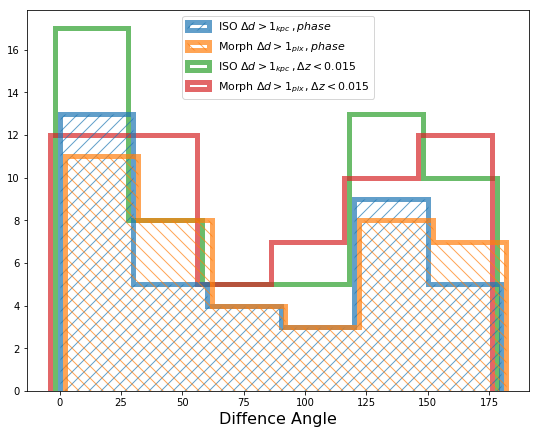

In [642]:
plt.figure(figsize=(9,7))
cond_iso = condition_1(tab['cen_offset_ISO-D'], tab['cen_offset_std_ISO-D'], tab['z'], thre=0.855) # 1 kpc
cond_mor = condition_1(tab['cen_offset_ISO-Dm'], tab['cen_offset_std_ISO-Dm'], tab['z'], thre=1) # 1 pix

d_angle_iso = tab['diff_angle_ISO-D'][cond_iso & in_cluster]
d_angle_mor = tab['diff_angle_ISO-Dm'][cond_mor & in_cluster]
plt.hist(d_angle_iso-2, histtype="step", bins=np.linspace(0,180,7), hatch="//", lw=5, alpha=0.7,
        label='ISO $\Delta d>1_{kpc}\,,phase$',zorder=2)
plt.hist(d_angle_mor+2, histtype="step", bins=np.linspace(0,180,7)+2, hatch="\\\\", lw=5, alpha=0.7,
        label='Morph $\Delta d>1_{pix}\,,phase$',zorder=2)

d_angle_iso_2 = tab['diff_angle_ISO-D'][cond_iso]
d_angle_mor_2 = tab['diff_angle_ISO-Dm'][cond_mor]
plt.hist(d_angle_iso_2-2, histtype="step", bins=np.linspace(0,180,7)-2, hatch="", lw=5, alpha=0.7,
        label='ISO $\Delta d>1_{kpc}\,,\Delta z<0.015$',zorder=1)
plt.hist(d_angle_mor_2+2, histtype="step", bins=np.linspace(0,180,7)-4, hatch="", lw=5, alpha=0.7,
         label='Morph $\Delta d>1_{pix}\,,\Delta z<0.015$',zorder=1)
plt.xlabel('Diffence Angle', fontsize=16)
plt.legend(loc=9,fontsize=11)

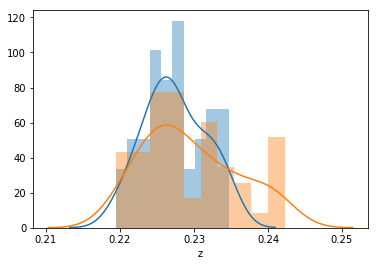

In [92]:
sns.distplot(tab['z'][cond_iso&in_cluster], bins=10)
sns.distplot(tab['z'][cond_iso], bins=10)

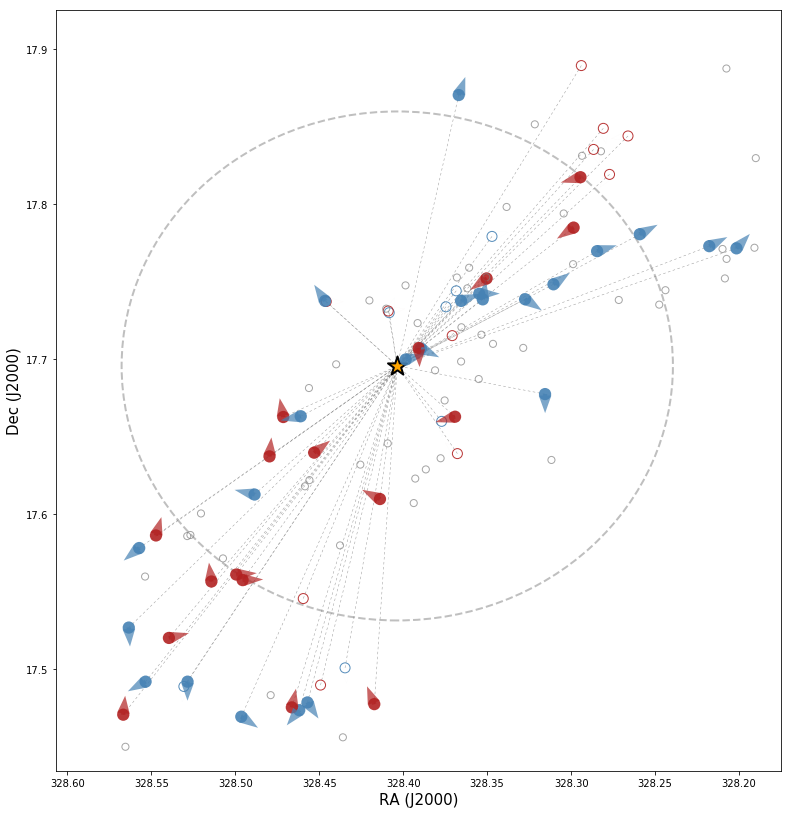

In [832]:
#old
fig, ax = plt.subplots(figsize=(13,14))
ax.set_xlim(tab['ra'].max() + 0.015, tab['ra'].min() - 0.015)
ax.set_ylim(tab['dec'].min() - 0.015, tab['dec'].max() + 0.015)
plt.xlabel("RA (J2000)", fontsize=15)
plt.ylabel("Dec (J2000)", fontsize=15)

coord_BCG = (328.40351201,17.69544013)

plt.scatter(coord_BCG[0], coord_BCG[1], s=400, marker='*', edgecolor="k", color="orange", lw=2, alpha=1,zorder=2)

circle = plt.Circle(coord_BCG, R_vir/len_pix*0.322/3600, color='gray', ls="--", lw=2., alpha=0.5, fill=False)
ax.add_artist(circle)
for k, (ID, x, y, pa, theta) in enumerate(zip(tab['ID'], tab['ra'], tab['dec'],
                                               tab['pa_ISO-D'], tab['diff_angle_ISO-D'])):
    color = "steelblue" if theta<90 else "firebrick"
    if (cond_iso& in_cluster)[k]:
        plt.scatter(x, y, s=150, color=color, edgecolors="none", alpha=0.9,zorder=2)
        plt.plot((x,coord_BCG[0]), (y,coord_BCG[1]), color="gray", ls="--", dashes=(5,5),  lw=.5, alpha=0.8, zorder=1)
        plt.arrow(x, y, -np.sin(pa*np.pi/180)*0.001, -np.cos(pa*np.pi/180)*0.001, 
                  color=color, width=0.0025, lw=0.01, alpha=0.7, zorder=2)
#         plt.text(x+(np.random.rand()*1-2)*0.002,y+(np.random.rand()*1-2)*0.002,'#'+ID,color='k',fontsize=8)
    elif (cond_iso & (~in_cluster))[k]:
        plt.scatter(x, y, s=100, facecolors="none", edgecolors=color, alpha=0.9,zorder=2)
        plt.plot((x,coord_BCG[0]), (y,coord_BCG[1]), color="gray", ls="--", dashes=(5,5),  lw=.5, alpha=0.8, zorder=1)
        plt.arrow(x, y, -np.sin(pa*np.pi/180)*0.001, -np.cos(pa*np.pi/180)*0.001, 
                  ec=color, fc="none", width=0.002, lw=0.01, alpha=0.7, zorder=2)
#         plt.text(x+(np.random.rand()*1-2)*0.002,y+(np.random.rand()*1-2)*0.002,'#'+ID,color='k',fontsize=7)
    elif theta>0:
        plt.scatter(x, y, s=50, facecolor='none', color="gray", alpha=0.7, zorder=2)


<IPython.core.display.Javascript object>


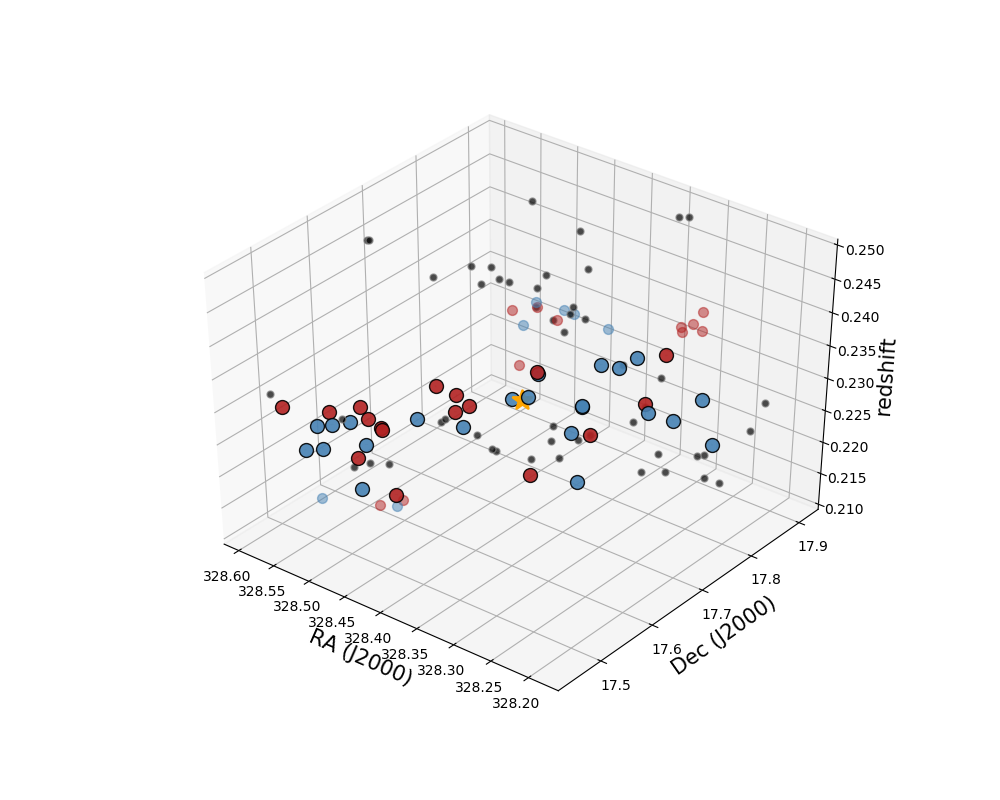

In [708]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim(tab['ra'].max() + 0.02, tab['ra'].min() - 0.02)
ax.set_ylim(tab['dec'].min() - 0.02, tab['dec'].max() + 0.02)
ax.set_zlim(0.21,0.25)
ax.set_xlabel("RA (J2000)", fontsize=15)
ax.set_ylabel("Dec (J2000)", fontsize=15)
ax.set_zlabel("redshift", fontsize=15)

coord_BCG = (328.40351201,17.69544013)

ax.scatter(coord_BCG[0], coord_BCG[1], 0.228, s=200, marker='*', color="orange", lw=2, alpha=1,zorder=2)

for k, (ID, x, y, z, pa, theta) in enumerate(zip(tab['ID'], tab['ra'], tab['dec'], tab['z'],
                                               tab['pa_ISO-D'], tab['diff_angle_ISO-D'])):
    color = "steelblue" if theta<90 else "firebrick"
    if (cond_iso& in_cluster)[k]:
        ax.scatter(x, y, z, s=100, color=color, edgecolors="none", alpha=0.9,zorder=2)
#         ax.plot((coord_BCG[0],x), (coord_BCG[1],y), (0.228,z), color="gray", ls="--", dashes=(5,5), lw=.5, alpha=0.8, zorder=1)
#         ax.arrow(x, y, z, -np.sin(pa*np.pi/180)*0.001, -np.cos(pa*np.pi/180)*0.001, 0,
#                   color=color, width=0.0025, lw=0.01, alpha=0.7, zorder=2)
        ax.quiver(x, y, z, -np.sin(pa*np.pi/180)*0.001, -np.cos(pa*np.pi/180)*0.001, 0,
                  color=color, length=0.1, alpha=0.7, zorder=2)
#         plt.text(x+(np.random.rand()*1-2)*0.002,y+(np.random.rand()*1-2)*0.002,'#'+ID,color='k',fontsize=8)
    elif (cond_iso & (~in_cluster))[k]:
        ax.scatter(x, y, z, s=50,  color=color, alpha=0.5,zorder=2)
#         ax.arrow(x, y, z, -np.sin(pa*np.pi/180)*0.001, -np.cos(pa*np.pi/180)*0.001, 0,
#                   ec=color, fc="none", width=0.002, lw=0.01, alpha=0.7, zorder=2)
#         plt.text(x+(np.random.rand()*1-2)*0.002,y+(np.random.rand()*1-2)*0.002,'#'+ID,color='k',fontsize=7)
    elif theta>0:
        ax.scatter(x, y, z, s=25, facecolor='none', color="gray", alpha=0.7, zorder=2)


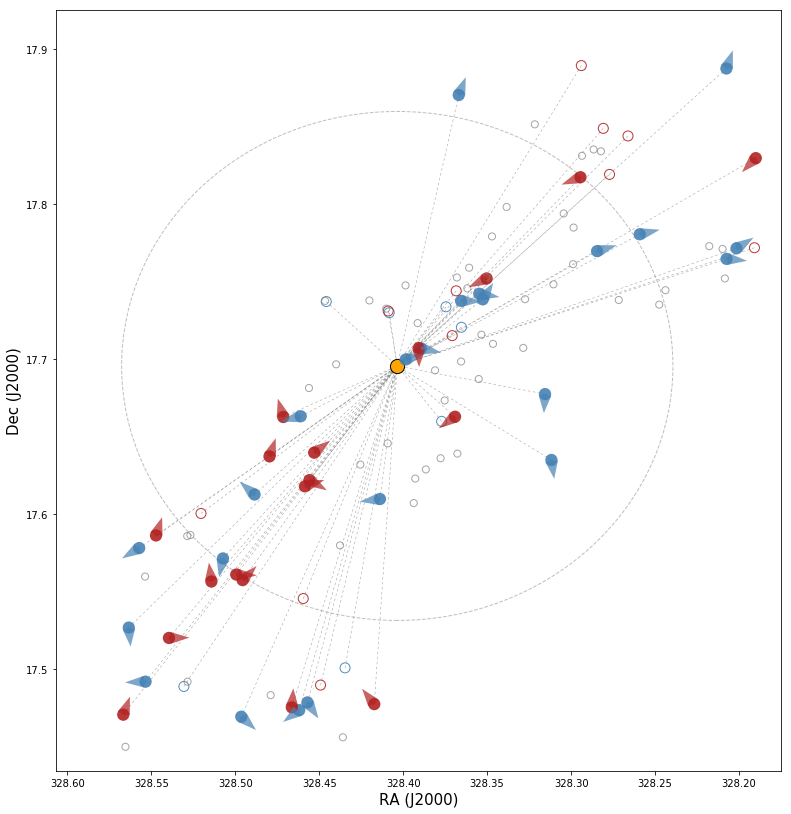

In [644]:
fig, ax = plt.subplots(figsize=(13,14))
ax.set_xlim(tab['ra'].max() + 0.015, tab['ra'].min() - 0.015)
ax.set_ylim(tab['dec'].min() - 0.015, tab['dec'].max() + 0.015)
plt.xlabel("RA (J2000)", fontsize=15)
plt.ylabel("Dec (J2000)", fontsize=15)

coord_BCG = (328.40351201,17.69544013)

plt.scatter(coord_BCG[0], coord_BCG[1], s=200, edgecolor="k", color="orange",alpha=1,zorder=2)

circle = plt.Circle(coord_BCG, R_vir/len_pix*0.322/3600, color='gray', ls="--", lw=1., alpha=0.5, fill=False)
ax.add_artist(circle)
for k, (ID, x, y, pa, theta) in enumerate(zip(tab['ID'], tab['ra'], tab['dec'],
                                               tab['pa_ISO-Dm'], tab['diff_angle_ISO-Dm'])):
    color = "steelblue" if theta<90 else "firebrick"
    if (cond_mor& in_cluster)[k]:
        plt.scatter(x, y, s=150, color=color, edgecolors="none", alpha=0.9,zorder=2)
        plt.plot((x,coord_BCG[0]), (y,coord_BCG[1]), color="gray", ls="--", dashes=(5,5),  lw=.5, alpha=0.8, zorder=1)
        plt.arrow(x, y, -np.sin(pa*np.pi/180)*0.001, -np.cos(pa*np.pi/180)*0.001, 
                  color=color, width=0.0025, lw=0.01, alpha=0.7, zorder=2)
#         plt.text(x+(np.random.rand()*1-2)*0.002,y+(np.random.rand()*1-2)*0.002,'#'+ID,color='k',fontsize=8)
    elif (cond_mor & (~in_cluster))[k]:
        plt.scatter(x, y, s=100, facecolors="none", edgecolors=color, alpha=0.9,zorder=2)
        plt.plot((x,coord_BCG[0]), (y,coord_BCG[1]), color="gray", ls="--", dashes=(5,5),  lw=.5, alpha=0.8, zorder=1)
        plt.arrow(x, y, -np.sin(pa*np.pi/180)*0.001, -np.cos(pa*np.pi/180)*0.001, 
                  ec=color, fc="none", width=0.002, lw=0.01, alpha=0.7, zorder=2)
#         plt.text(x+(np.random.rand()*1-2)*0.002,y+(np.random.rand()*1-2)*0.002,'#'+ID,color='k',fontsize=7)
    elif theta>0:
        plt.scatter(x, y, s=50, facecolor='none', color="gray", alpha=0.7, zorder=2)


# A2465C

In [117]:
from astropy.cosmology import FlatLambdaCDM
h = 0.7
cosmo = FlatLambdaCDM(H0=100*h, Om0=0.3)
distance_cluster = cosmo.angular_diameter_distance(z=0.245)
print(distance_cluster)

len_1arc = distance_cluster*u.arcsec.to(u.rad)
len_pix = len_1arc * 0.322  #pixel length in Mpc
print(len_pix)
print("1kpc = %.3f pix"%(1/len_pix.to(u.kpc)).value)

v_vir = 1100 * u.km/u.s #velocity_dispersion
R_vir = 1.51/h * u.Mpc
print(R_vir, v_vir)

l_R200 = (len_pix/R_vir).value # pixel length in R200 1 pix = l R_vir

794.562953587183 Mpc
0.0012403922690940134 Mpc
1kpc = 0.806 pix
2.1571428571428575 Mpc 1100.0 km / s


In [118]:
datacube_D = Read_Datacube('./proc/A2465C/A2465C_cube.fits', 
                         name='A2465C', z0=0.245, mode="MMA",
                         table='./proc/A2465C/A2465C_MMA.dat', 
                         seg_map='./proc/A2465C/A2465C_segm_MMA.fits',
                         deep_frame='./proc/A2465C/A2465C_DF.fits',
                         mask_edge='./proc/A2465C/Raw_stack_A2465C_mask.fits')
datacube_D.get_wcs()
Z_bound = fits.getdata('./A2465C/A2465C_bound_v2.fits').astype("int")

id_BCG1 = np.argmin((datacube_D.table["xcentroid"]-707)**2 + (datacube_D.table["ycentroid"]-1385)**2)
id_BCG2 = np.argmin((datacube_D.table["xcentroid"]-1446)**2 + (datacube_D.table["ycentroid"]-679)**2)
pos_BCG = np.array(datacube_D.assign_BCG_position(id_BCG=[id_BCG1,id_BCG2]))

In [119]:
tab_A2465C = Table.read('./proc/centroid_analysis_A2465C.txt', format='ascii')
tab_A2465C['radius'] = np.array([datacube_D.table['equivalent_radius'][datacube_D.table["NUMBER"].astype(str)==re.findall(r'\d+', ID)[0]] for ID in tab['ID']]).ravel()
tab = tab_A2465C.copy()
tab

<Table length=120>
  ID     ra      dec      z    ... pa_APER clus_cen_angle dist_clus_cen  radius
 str5 float64  float64 float64 ... float64    float64        float64    float64
----- -------- ------- ------- ... ------- -------------- ------------- -------
   9D 339.8778 -5.8445  0.2447 ...   60.48        335.745       690.161    3.14
  24D 339.8082 -5.8396  0.2467 ...  85.093         40.477       755.562    2.93
  28D 339.8428 -5.8387  0.2183 ...  14.135         10.616       574.653    4.89
  46D 339.9048 -5.8343  0.2436 ... 275.664        311.405       778.554    5.05
  52D  339.857 -5.8334  0.2339 ...   8.189        354.077       507.362    4.07
  93D 339.9171 -5.8266  0.2469 ...     nan            nan           nan    1.69
  94D 339.8645 -5.8269  0.2449 ...     nan            nan           nan    2.46
  99D 339.8528 -5.8259  0.2327 ...   270.0        359.193       421.413    5.01
 101D  339.842 -5.8254  0.2424 ...  53.148         15.409       431.642    3.39
 122D  339.842 -5.8213  0.2438 ...     nan            nan           nan    2.39
  ...      ...     ...     ... ...     ...            ...           ...     ...
1191D 339.9101 -5.7791  0.2472 ... 323.961        260.947       651.291    4.48
1192D 339.9092 -5.7784  0.2471 ...  17.063         260.14       642.678    5.92
1198D 339.8645 -5.7681  0.2502 ... 214.665        211.128       262.141    5.41
1205D 339.8142 -5.7653  0.2482 ... 204.837        121.148       495.454    5.08
1214D  339.885 -5.7629  0.2448 ... 270.527        232.031       460.674    8.35
1215D 339.8844 -5.7621  0.2452 ... 222.096        230.771       461.124    5.29
1223D 339.8102 -5.7447  0.2285 ...  40.003        136.103       675.754    4.03
1224D 339.8088 -5.7444   0.247 ... 184.978        135.318       688.693    5.84
1225D 339.8097 -5.7443  0.2276 ... 158.854        136.026       682.809    3.91
1228D 339.8184 -5.7338  0.2468 ...     nan            nan           nan    3.57

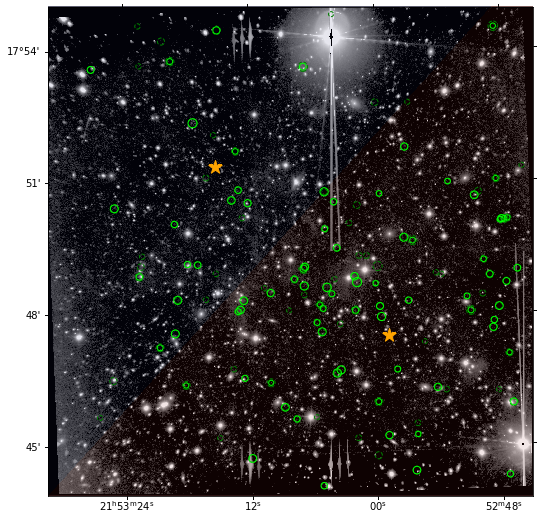

In [120]:
fig = plt.figure(figsize=(9,9))
ax = plt.subplot(111, projection=datacube.wcs)
plt.scatter(tab['X'], tab['Y'], s=tab['radius']*10+10, facecolor="none", edgecolor="g", linestyle='--')

tab_iso = tab[tab['cen_offset_ISO-D']>0]
plt.scatter(tab_iso['X'], tab_iso['Y'], s=tab['radius']*10+10, facecolor="none", edgecolor="lime")
plt.scatter(pos_BCG[:,0], pos_BCG[:,1], s=200, color="orange", marker="*")
plt.imshow(Z_bound, cmap='seismic',alpha=0.9)
plt.imshow(datacube.deep_frame, norm=norm1, cmap='gray', vmin=np.median(datacube.deep_frame), vmax=1e3,alpha=0.9)

(array([10., 29., 15., 10.,  2.,  5.,  1.,  1.,  0.,  1.,  0.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
 <a list of 11 Patch objects>)

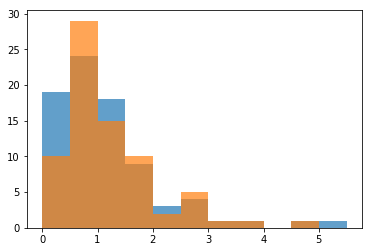

In [121]:
plt.hist(tab_A2465C['cen_offset_ISO-D'], bins=np.arange(0,6,0.5),alpha=0.7)
plt.hist(tab_A2465C['cen_offset_ISO-Dm'], bins=np.arange(0,6,0.5),alpha=0.7)

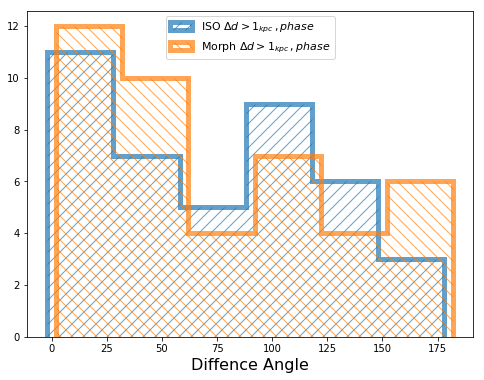

In [133]:
plt.figure(figsize=(8,6))

cond_iso = condition_1(tab['cen_offset_ISO-D'], tab['cen_offset_std_ISO-D'], tab['z'], z0=0.245, thre=0.806) # 1 kpc
cond_mor = condition_1(tab['cen_offset_ISO-Dm'], tab['cen_offset_std_ISO-Dm'], tab['z'], z0=0.245, thre=0.806) # 1 kpc

d_angle_iso = tab['diff_angle_ISO-D'][cond_iso]
d_angle_mor = tab['diff_angle_ISO-Dm'][cond_mor]
plt.hist(d_angle_iso-2, histtype="step", bins=np.linspace(0,180,7)-2, hatch="//", lw=5, alpha=0.7,
        label='ISO $\Delta d>1_{kpc}\,,phase$',zorder=2)
plt.hist(d_angle_mor+2, histtype="step", bins=np.linspace(0,180,7)+2, hatch="\\\\", lw=5, alpha=0.7,
        label='Morph $\Delta d>1_{kpc}\,,phase$',zorder=2)

plt.xlabel('Diffence Angle', fontsize=16)

plt.legend(loc=9,fontsize=11)

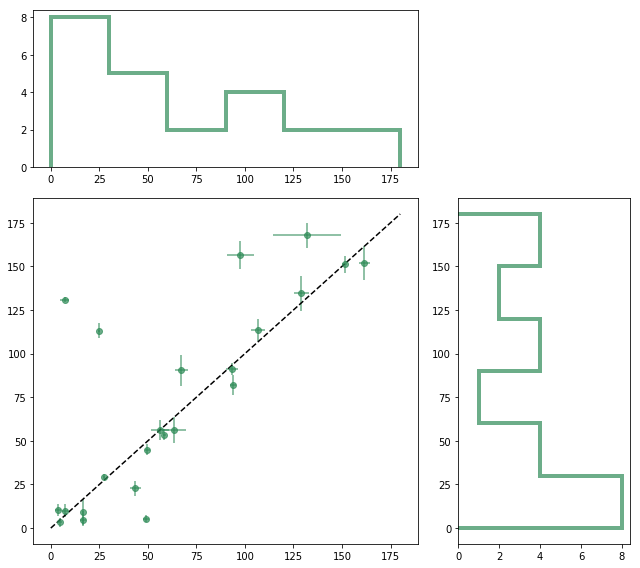

In [95]:
fig = plt.figure(figsize=(9,8))
ax1 = plt.subplot2grid((3, 3), (1, 0), rowspan=2, colspan=2)
ax1.errorbar(tab['diff_angle_ISO-D'][cond_iso&cond_mor], tab['diff_angle_ISO-Dm'][cond_iso&cond_mor],
             xerr=tab['diff_angle_std_ISO-D'][cond_iso&cond_mor],
             yerr=tab['diff_angle_std_ISO-Dm'][cond_iso&cond_mor], fmt="o", color="seagreen", alpha=0.7)
xx = np.linspace(0,180,10)
plt.plot(xx,xx,"k--")

ax2 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
ax2.hist(tab['diff_angle_ISO-D'][cond_iso&cond_mor], histtype="step", bins=np.linspace(0,180,7),
         color="seagreen", lw=4, alpha=0.7)
ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax3.hist(tab['diff_angle_ISO-Dm'][cond_iso&cond_mor], histtype="step", bins=np.linspace(0,180,7),
         color="seagreen", orientation="horizontal", lw=4, alpha=0.7, )
plt.tight_layout()

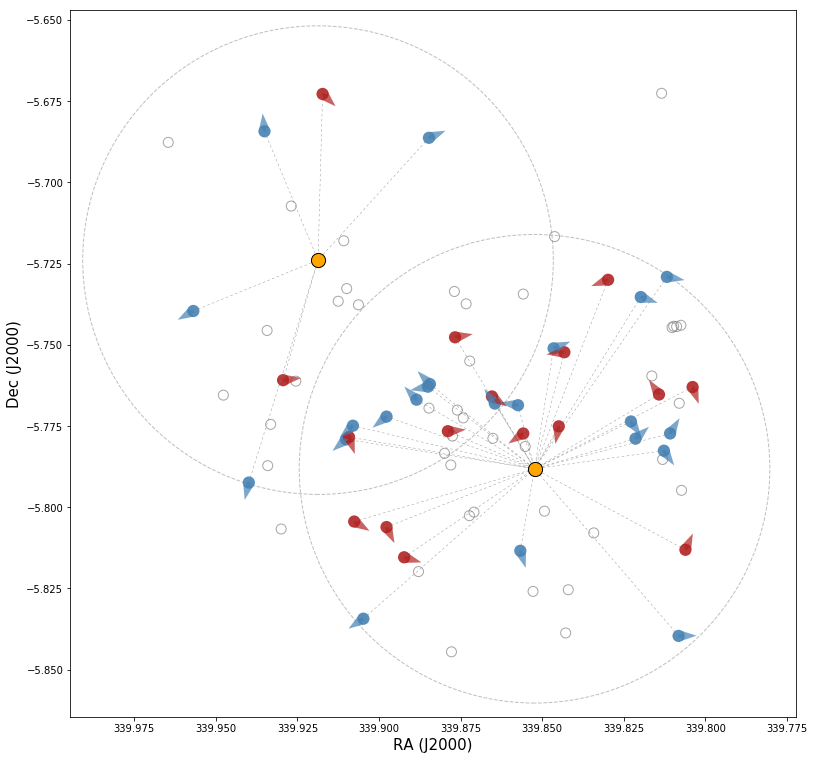

In [130]:
fig, ax = plt.subplots(figsize=(13,13))
ax.set_xlim(tab['ra'].max() + 0.03, tab['ra'].min() - 0.03)
ax.set_ylim(tab['dec'].min() - 0.02, tab['dec'].max() + 0.02)
plt.xlabel("RA (J2000)", fontsize=15)
plt.ylabel("Dec (J2000)", fontsize=15)

coord_BCG = ((339.91869588, -5.72394458), (339.85233922, -5.78816229))
for i in [0,1]:
    plt.scatter(coord_BCG[i][0],coord_BCG[i][1], s=200, edgecolor="k", color="orange", alpha=1,zorder=3)
    circle = plt.Circle(coord_BCG[i], 1*u.Mpc/len_pix*0.322/3600, color='gray', ls="--", lw=1., alpha=0.5, fill=False) #1 Mpc
    ax.add_artist(circle)

for k, (ID, ra, dec, z, pa, theta) in enumerate(zip(tab['ID'], tab['ra'], tab['dec'], tab['z'],
                                                tab['pa_ISO-D'], tab['diff_angle_ISO-D'])):
    color = "steelblue" if theta<90 else "firebrick"
    if (cond_iso & (abs(tab['z']-0.245)<=0.015))[k]:
        plt.scatter(ra, dec, s=150, color=color, edgecolors="none", alpha=0.9,zorder=2)

        x, y = datacube_D.wcs.all_world2pix(ra, dec, 0)
        member = Z_bound[np.int(y), np.int(x)] - 1
        plt.plot((ra, coord_BCG[member][0]), (dec,coord_BCG[member][1]), color="gray",
                 ls="--", dashes=(5,5),  lw=.5, alpha=0.8, zorder=2)

        plt.arrow(ra, dec, -np.sin(pa*np.pi/180)*0.001, -np.cos(pa*np.pi/180)*0.001, 
                  color=color, width=0.001, lw=0.01, alpha=0.7, zorder=2)
        
    elif (cond_iso & (abs(tab['z']-0.245)>0.015))[k]:
        plt.scatter(ra, dec, s=100, facecolors="none", edgecolors=color, alpha=0.9,zorder=2)
    elif theta>0:
        plt.scatter(ra, dec, s=100, facecolor='none', color="gray", alpha=0.7, zorder=2)
    

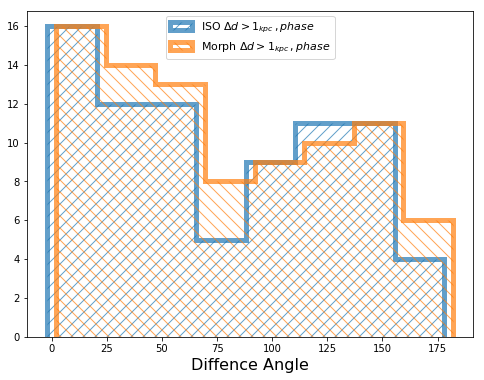

In [171]:
plt.figure(figsize=(8,6))

plt.hist(d_angle_iso_tot-2, histtype="step", bins=np.linspace(0,180,9)-2, hatch="//", lw=5, alpha=0.7,
        label='ISO $\Delta d>1_{kpc}\,,phase$',zorder=2)
plt.hist(d_angle_mor_tot+2, histtype="step", bins=np.linspace(0,180,9)+2, hatch="\\\\", lw=5, alpha=0.7,
        label='Morph $\Delta d>1_{kpc}\,,phase$',zorder=2)

plt.xlabel('Diffence Angle', fontsize=16)

plt.legend(loc=9,fontsize=11)